<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install delayed

In [ ]:
!pip install fancyimpute  

In [50]:
!pip install --quiet pandas-datareader

In [ ]:
!pip install --quiet yfinance

In [60]:
!pip install --quiet fbprophet

In [61]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn
from fancyimpute import KNN


import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

from fbprophet import Prophet

%matplotlib inline

In [5]:
from google.colab import files
import io
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [191]:
df = pd.read_csv(io.StringIO(uploaded['owid-covid-data.csv'].decode('utf-8')))

In [7]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
#Dimensões do data frame
df.shape

(74141, 60)

# **Análise descritiva dos dados**

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,7.094200e+04,70943.000000,70213.000000,6.492600e+04,65069.000000,70213.000000,70419.000000,70420.000000,69695.000000,64416.000000,64559.000000,69695.000000,59527.000000,7306.000000,7306.000000,9570.000000,9570.000000,714.000000,714.000000,1203.000000,1203.000000,3.266700e+04,3.214000e+04,32140.000000,32667.000000,3.828000e+04,38280.000000,35386.000000,34875.000000,1.290500e+04,1.248300e+04,1.057500e+04,1.068100e+04,2.280900e+04,12905.000000,12483.000000,10575.000000,22809.000000,62361.000000,7.348400e+04,69554.000000,65618.000000,65618.000000,65618.000000,66401.000000,45636.000000,65973.000000,68386.000000,51595.000000,50550.000000,33716.000000,59774.000000,69495.000000,66665.000000,2649.000000
mean,7.685564e+05,4288.232003,4301.165229,2.012024e+04,98.902688,91.151381,13608.123088,75.711113,75.888720,298.877602,1.533738,1.413868,1.006272,617.099918,24.515842,2745.235423,158.032057,275.640789,21.843279,1457.002628,92.659555,3.373411e+04,5.007251e+06,324.210666,2.150988,3.262793e+04,2.029877,0.097022,160.379014,2.786809e+07,1.415908e+07,7.373994e+06,5.752054e+05,2.748370e+05,26.438953,17.603828,11.069312,3325.704459,59.167988,1.006739e+08,417.388066,30.257027,8.710934,5.539211,17931.063554,12.660078,257.185129,7.790804,10.680463,32.358065,51.653862,2.948233,73.090566,0.723605,19.845557
std,4.059763e+06,23040.733892,22819.192974,8.963180e+04,445.717886,414.856426,24648.969672,167.081591,150.206105,543.501427,3.824851,2.992689,0.340857,1144.974163,27.358282,6264.884464,213.851545,600.045459,38.806532,3082.089592,165.091087,1.413671e+05,2.369908e+07,750.687909,5.786107,1.287795e+05,4.968928,0.101945,839.049856,1.353398e+08,6.845105e+07,3.116081e+07,2.541426e+06,1.714296e+06,33.118039,19.922909,15.148302,4773.307721,21.057318,4.473102e+08,1998.540229,8.948838,6.213310,4.258992,18160.569442,20.032168,114.215768,4.201785,10.872225,13.747453,32.563839,2.496525,7.699478,0.151433,39.327383
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1583.000000,-63.000000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.689300e+04,0.000000e+00,0.000000,-8.538000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,2.339000,1.114000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.633000e+03,3.000000,9.286000,6.000000e+01,0.000000,0.000000,315.341000,0.381000,1.600000,9.304000,0.000000,0.000000,0.840000,23.000000,3.933500,90.000000,20.035500,7.017500,1.871250,30.358500,7.774000,1.674000e+03,1.589632e+05,15.471750,0.159000,1.702750e+03,0.154000,0.020000,6.900000,1.125320e+05,8.704900e+04,4.403000e+04,3.528000e+03,8.580000e+02,2.600000,2

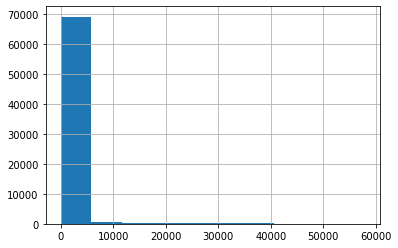

In [ ]:
(df['total_cases']/1000).hist()

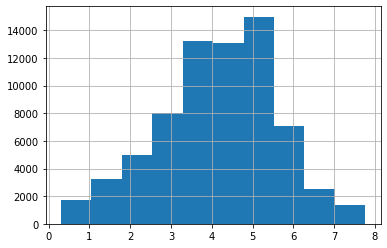

In [ ]:
df['log_total_cases'] = df['total_cases'].apply(np.log10)
df[df['log_total_cases'] > 0]['log_total_cases'].hist()

#10^4 é o pico

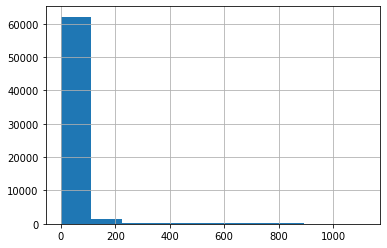

In [ ]:
(df['total_deaths']/1000).hist()

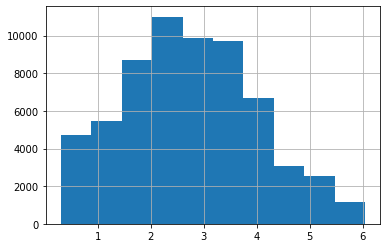

In [ ]:
df['log_total_deaths'] = df['total_deaths'].apply(np.log10)
df[df['log_total_deaths'] > 0]['log_total_deaths'].hist()

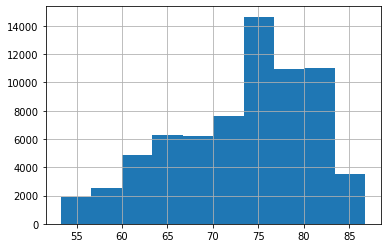

In [ ]:
(df['life_expectancy']).hist()

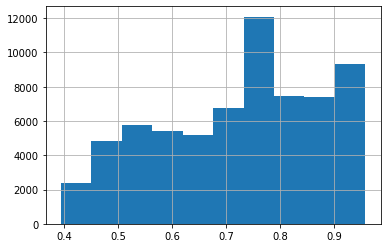

In [ ]:
(df['human_development_index']).hist()

Categorização de algumas variáveis com o objetivo de melhorar a compreensão da base de dados usada.

In [213]:
df['hdi_category'] = 'NaN'
df.loc[(df['human_development_index'] >= 0.8), 'hdi_category'] = 'Desenvolvido'
df.loc[(df['human_development_index'] >= 0.555) & (df['human_development_index'] < 0.8 ), 'hdi_category'] = 'Em Desenvolvimento'
df.loc[(df['human_development_index'] >= 0.350) & (df['human_development_index'] < 0.555 ), 'hdi_category'] = 'Subdesenvolvido'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido


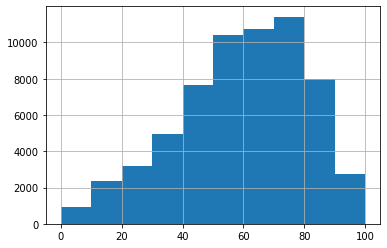

In [ ]:
(df['stringency_index']).hist()

In [214]:
df['stringency_index'].describe()

df['stringency_category'] = 'NaN'
df.loc[(df['stringency_index'] >= 74), 'stringency_category'] = 'Alta_estringencia'
df.loc[(df['stringency_index'] >= 60) & (df['stringency_index'] < 74 ), 'stringency_category'] = 'Media_estringencia'
df.loc[(df['stringency_index'] >= 20) & (df['stringency_index'] < 60 ), 'stringency_category'] = 'Baixa_estringencia'
df.loc[(df['stringency_index'] < 20 ), 'stringency_category'] = 'Nenhuma_estringencia'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category,stringency_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia


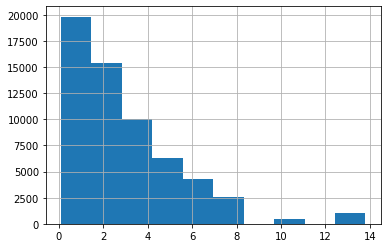

In [ ]:
(df['hospital_beds_per_thousand']).hist()

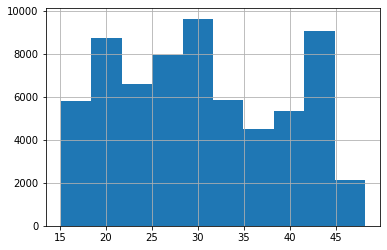

In [ ]:
(df['median_age']).hist()

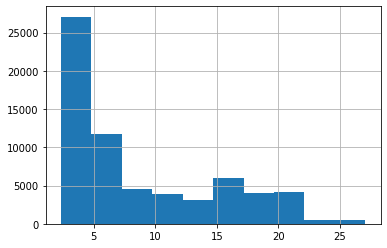

In [ ]:
(df['aged_65_older']).hist()

0.25     3.607
0.50     6.211
0.75    13.928
Name: aged_65_older, dtype: float64

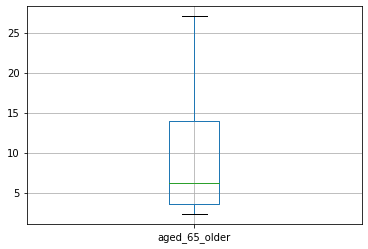

In [ ]:
df.boxplot(column=['aged_65_older'])
df['aged_65_older'].quantile([0.25,0.5,0.75])

In [215]:
df['aged_65_older_category'] = 'NaN'
df.loc[(df['aged_65_older'] > 13.928), 'aged_65_older_category'] = 'População com muitíssimos velhos'
df.loc[(df['aged_65_older'] > 6.211) & (df['aged_65_older'] <= 13.928), 'aged_65_older_category'] = 'População com muitos velhos'
df.loc[(df['aged_65_older'] > 3.607) & (df['aged_65_older'] <= 6.211), 'aged_65_older_category'] = 'População com poucos velhos'
df.loc[(df['aged_65_older'] <= 3.607), 'aged_65_older_category'] = 'População com pouquíssimos velhos'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category,stringency_category,aged_65_older_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos


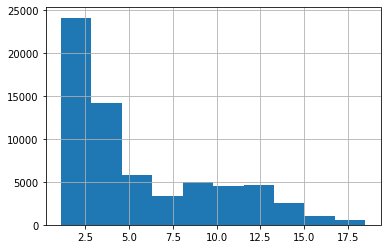

In [ ]:
(df['aged_70_older']).hist()

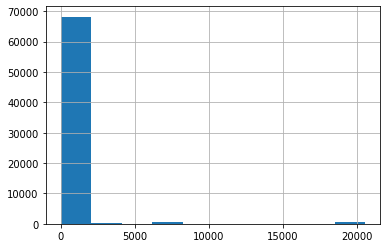

In [ ]:
(df['population_density']).hist()

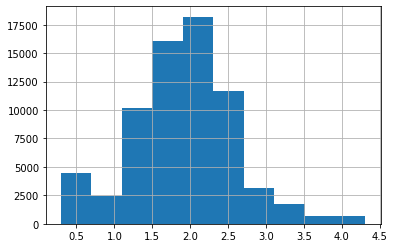

In [ ]:
df['log_population_density'] = df['population_density'].apply(np.log10)
df[df['log_population_density'] > 0]['log_population_density'].hist()

In [216]:
df['density_category'] = 'NaN'
df.loc[(df['population_density'] > 500), 'density_category'] = 'Altamente Povoado'
df.loc[(df['population_density'] >= 101) & (df['population_density'] <= 500 ), 'density_category'] = 'Muito Povoado'
df.loc[(df['population_density'] >= 41) & (df['population_density'] <= 100 ), 'density_category'] = 'Povoado'
df.loc[(df['population_density'] >= 11) & (df['population_density'] <= 40 ), 'density_category'] = 'Pouco Povoado'
df.loc[(df['population_density'] >= 2) & (df['population_density'] <= 10 ), 'density_category'] = 'Pouquíssimo  Povoado'
df.loc[(df['population_density'] < 2), 'density_category'] = 'Não Povoado'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category,stringency_category,aged_65_older_category,density_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,Povoado
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,Povoado
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,Povoado
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,Povoado
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia,População com pouquíssimos velhos,Povoado


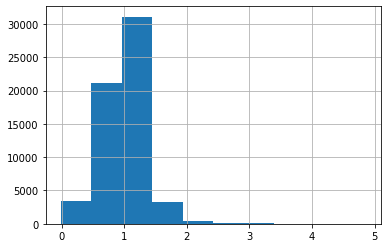

In [ ]:
(df['reproduction_rate']).hist()

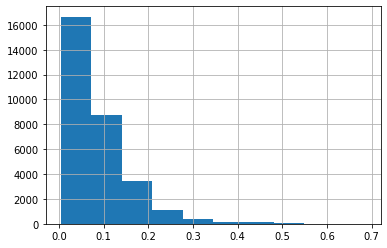

In [ ]:
df['log_reproduction_rate'] = df['reproduction_rate'].apply(np.log10)
df[df['log_reproduction_rate'] > 0]['log_reproduction_rate'].hist()

## Estatísticas univariadas

In [ ]:
print('Mean: ')
print(df[df['location'] == 'Brazil']['total_cases'].mean())

print('Median: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

print('Mode: ')
print(df[df['location'] == 'Brazil']['total_cases'].mode())

Mean: 
6866582.305555556
Median: 
5578037.0
Mode: 
0    2.0
dtype: float64


In [ ]:
def est_univ(col_base, val_col_base, col_exp):
  print('Mean: ')
  print(df[df[col_base] == val_col_base][col_exp].mean())

  print('')

  print('Median: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Mode: ')
  print(df[df[col_base] == val_col_base][col_exp].mode())

  print('')

  print('Variance: ')
  print(df[df[col_base] == val_col_base][col_exp].var())

  print('')

  print('STD: ')
  print(df[df[col_base] == val_col_base][col_exp].std())

  print('')

  print('Describe: ')
  print(df[df[col_base] == val_col_base][col_exp].describe())

In [ ]:
est_univ('continent', 'South America', 'total_cases')

Mean: 
1306204.443301275

Median: 
260059.0

Mode: 
0    1.0
dtype: float64

Variance: 
8481236338601.818

STD: 
2912256.2281849133

Describe: 
count    4.471000e+03
mean     1.306204e+06
std      2.912256e+06
min      1.000000e+00
25%      1.867250e+04
50%      2.600590e+05
75%      1.174813e+06
max      1.915199e+07
Name: total_cases, dtype: float64


In [ ]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [ ]:
IQR(df, 'total_cases')

145890.25

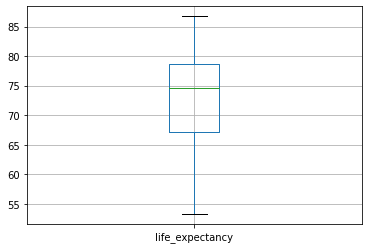

In [ ]:
df.boxplot(column=['life_expectancy'])

In [ ]:
df[df['continent']=='South America'].groupby(['location']).agg(['mean','median'])['total_cases']

,mean,median
location,,
Argentina,1.393110e+06,1228814.0
Bolivia,1.631326e+05,142664.0
Brazil,6.842158e+06,5566049.0
Chile,5.917152e+05,512502.0
Colombia,1.396592e+06,1140167.0
Ecuador,1.893185e+05,171783.0
Falkland Islands,NaN,NaN
Guyana,5.958758e+03,4574.0
Paraguay,1.137562e+05,67768.5


In [ ]:
def compare_mean_median_continent(continent_name, label):
  return df[df['continent']== continent_name].groupby(['location']).agg(['mean','median'])[label]

In [ ]:
compare_mean_median_continent('Asia', 'total_cases')

,mean,median
location,,
Afghanistan,4.263653e+04,41633.0
Armenia,1.050265e+05,99563.0
Azerbaijan,1.345320e+05,60873.0
Bahrain,8.983119e+04,82133.0
Bangladesh,4.066480e+05,421079.5
Bhutan,5.697024e+02,359.0
Brunei,1.678595e+02,148.0
Cambodia,5.439681e+03,285.0
China,8.341227e+04,85711.5


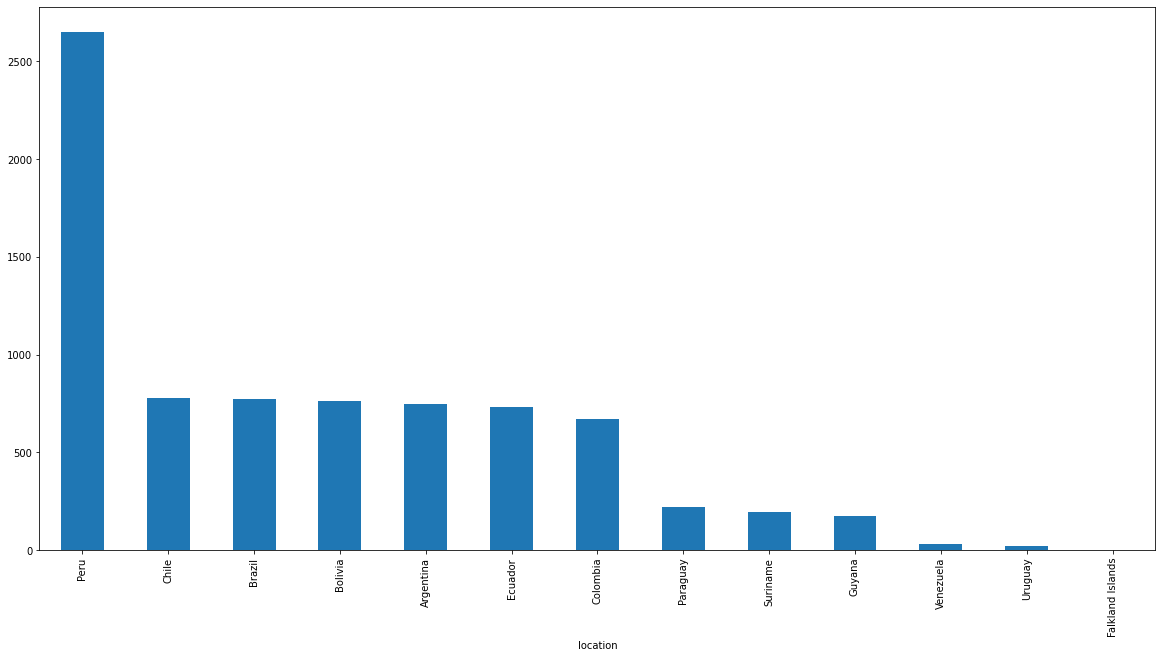

In [ ]:
# Medianas

df[df['continent']=='South America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

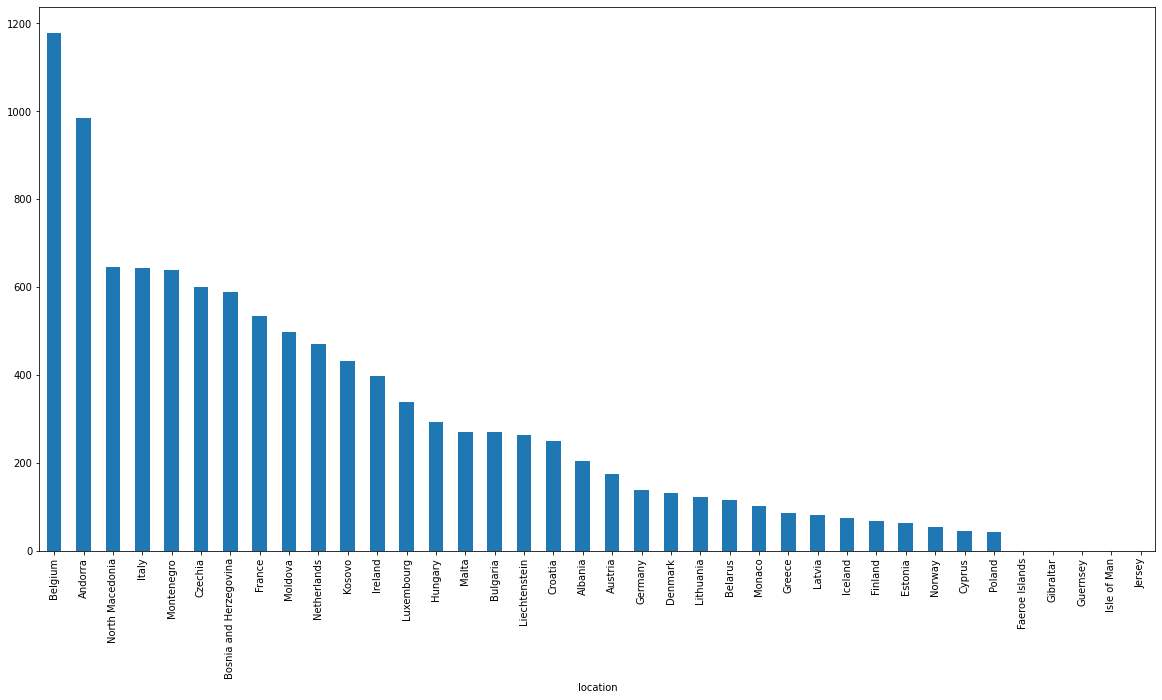

In [ ]:
df[df['continent']=='Europe'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

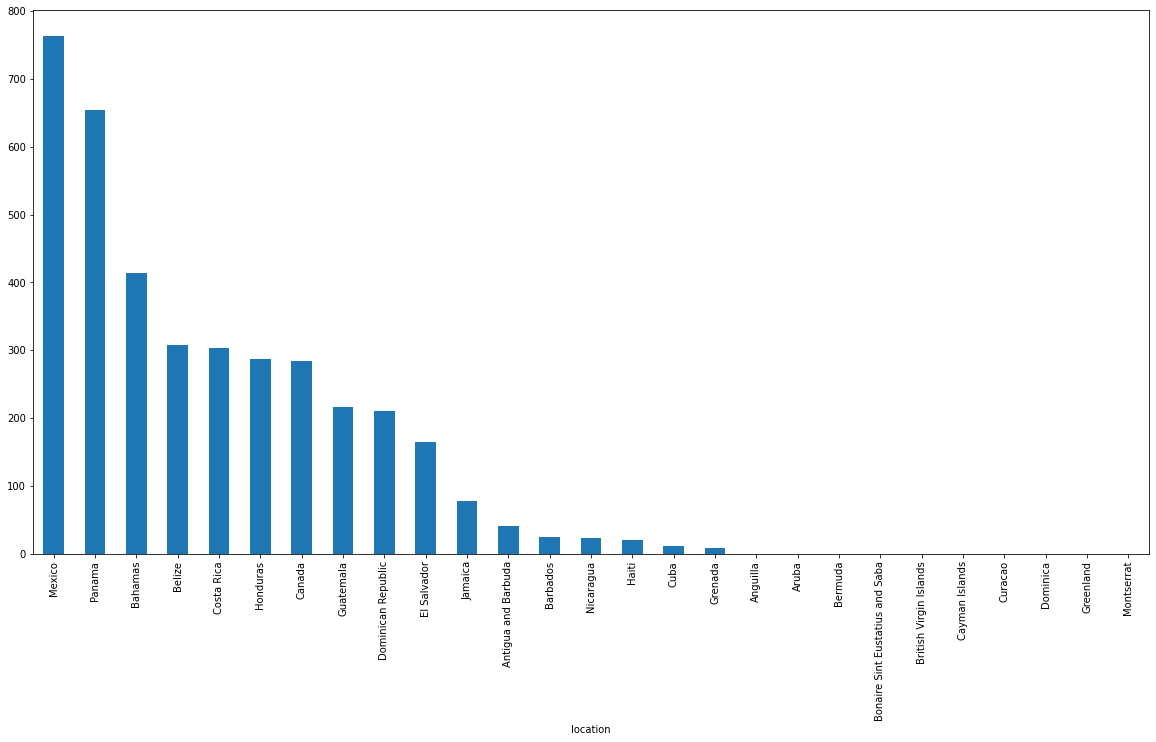

In [ ]:
df[df['continent']=='North America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

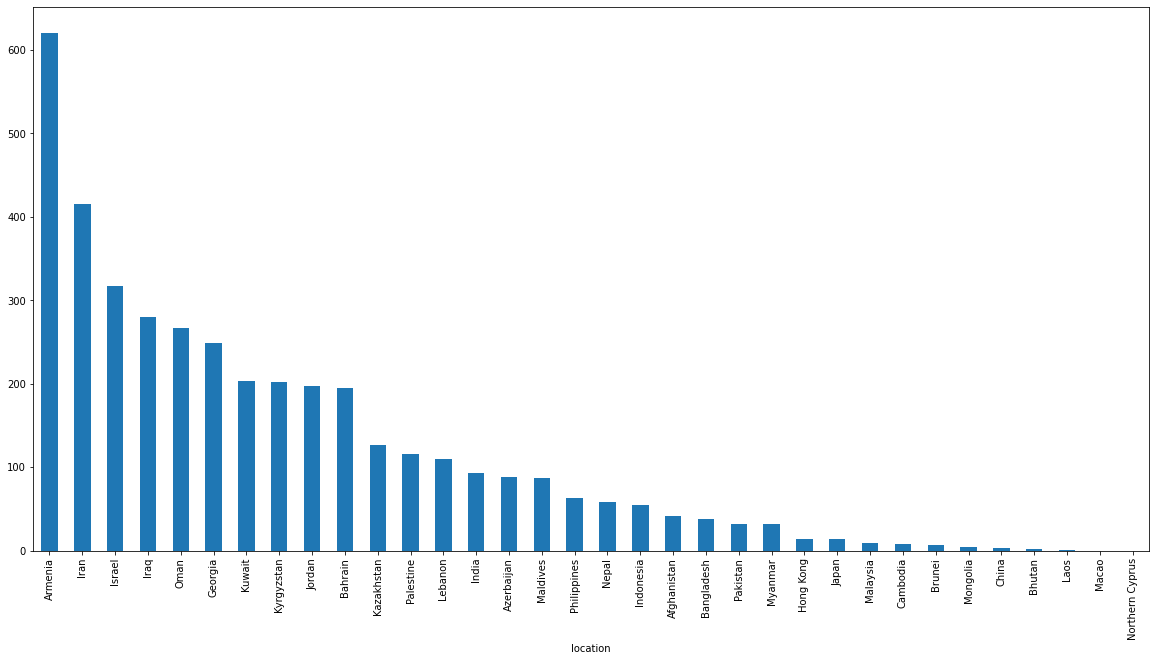

In [ ]:
df[df['continent']=='Asia'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

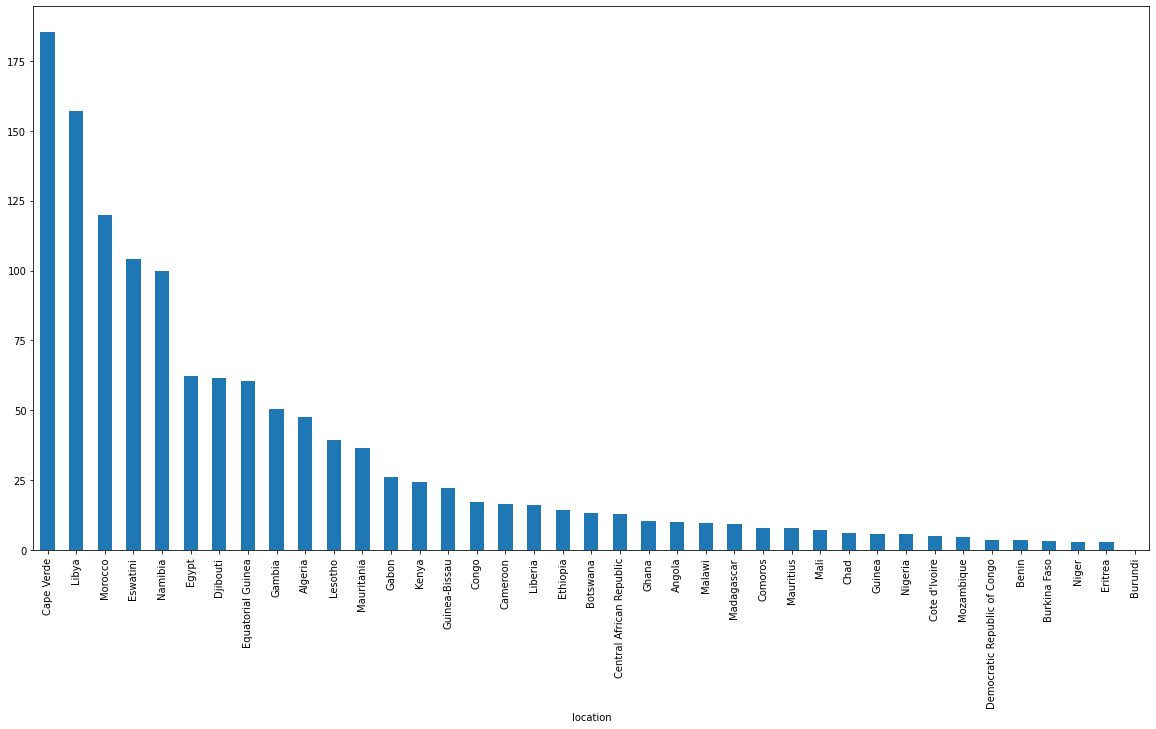

In [ ]:
df[df['continent']=='Africa'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

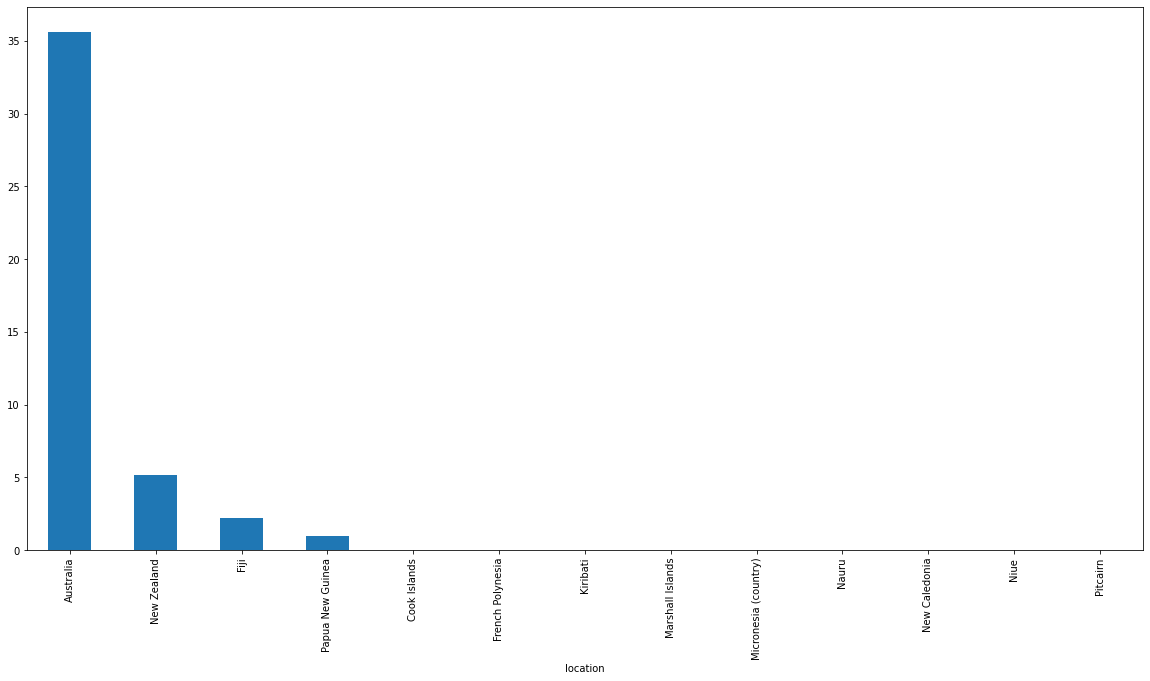

In [ ]:
df[df['continent']=='Oceania'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

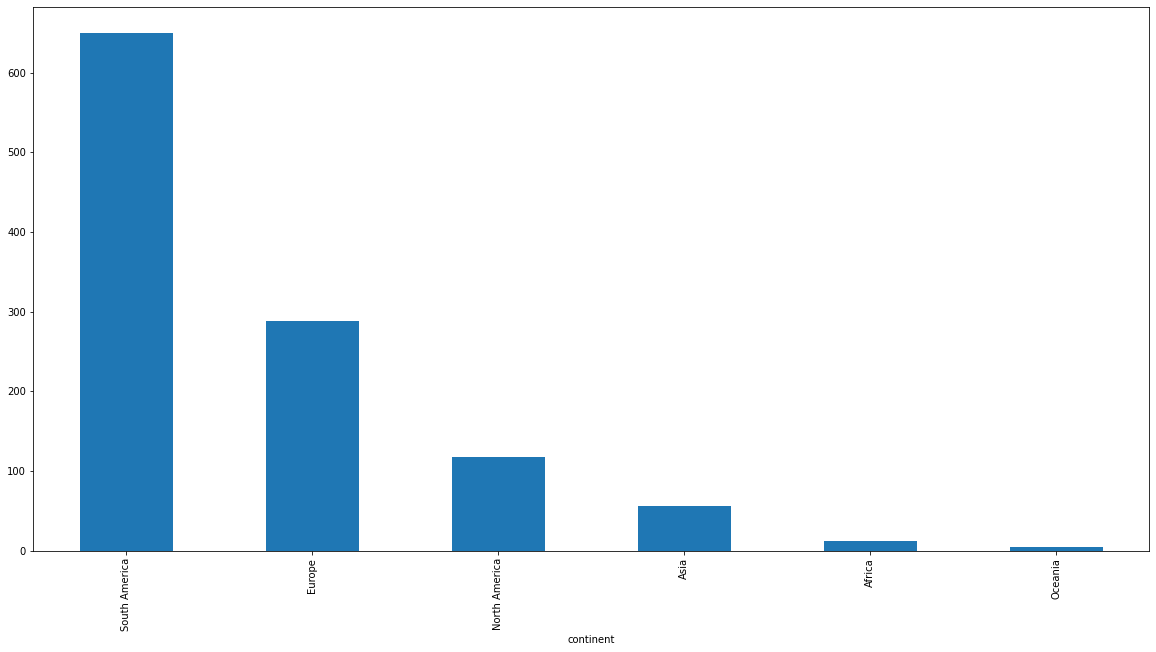

In [ ]:
df.groupby(['continent'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

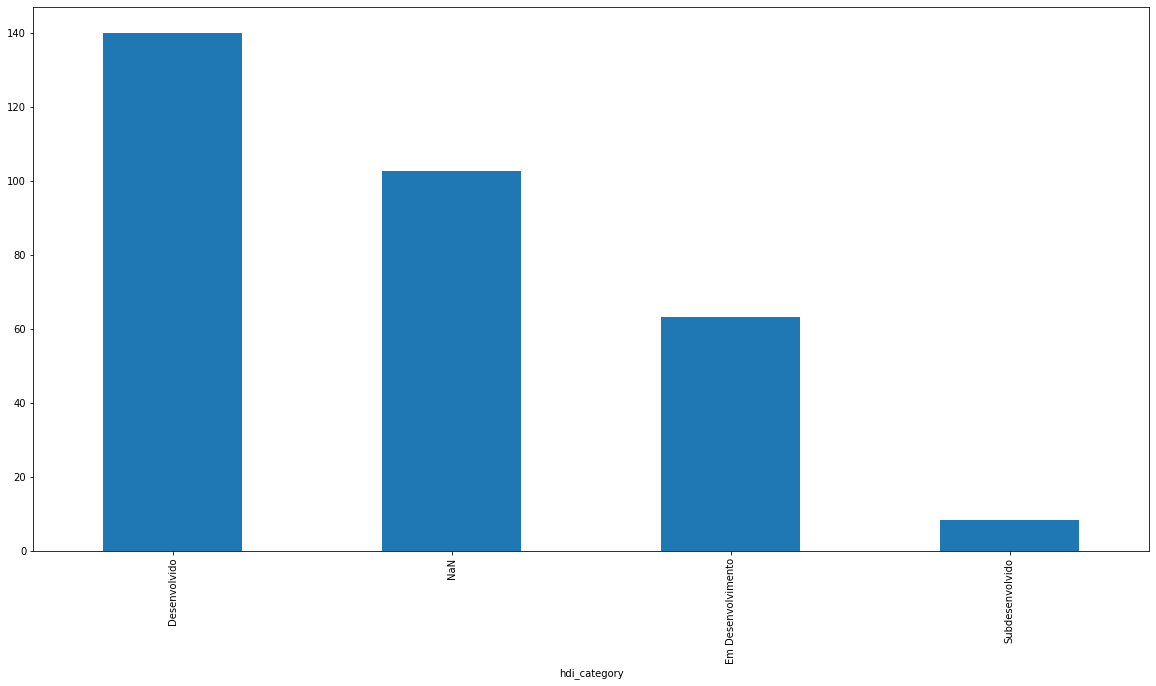

In [ ]:
df.groupby(['hdi_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

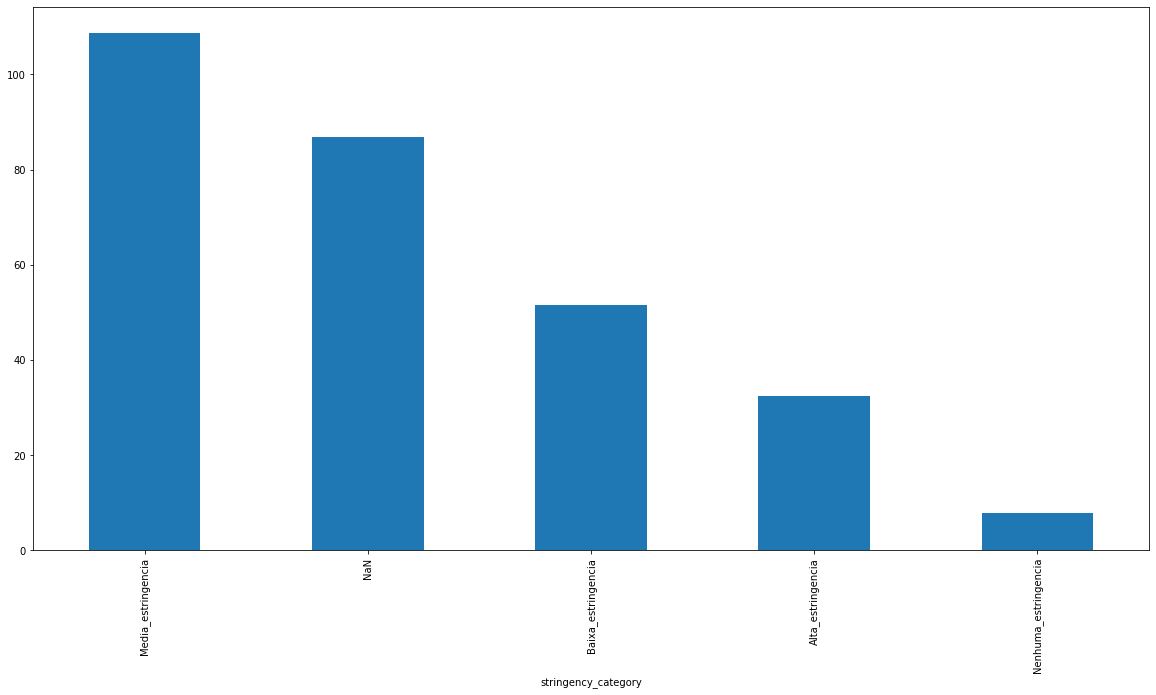

In [ ]:
df.groupby(['stringency_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

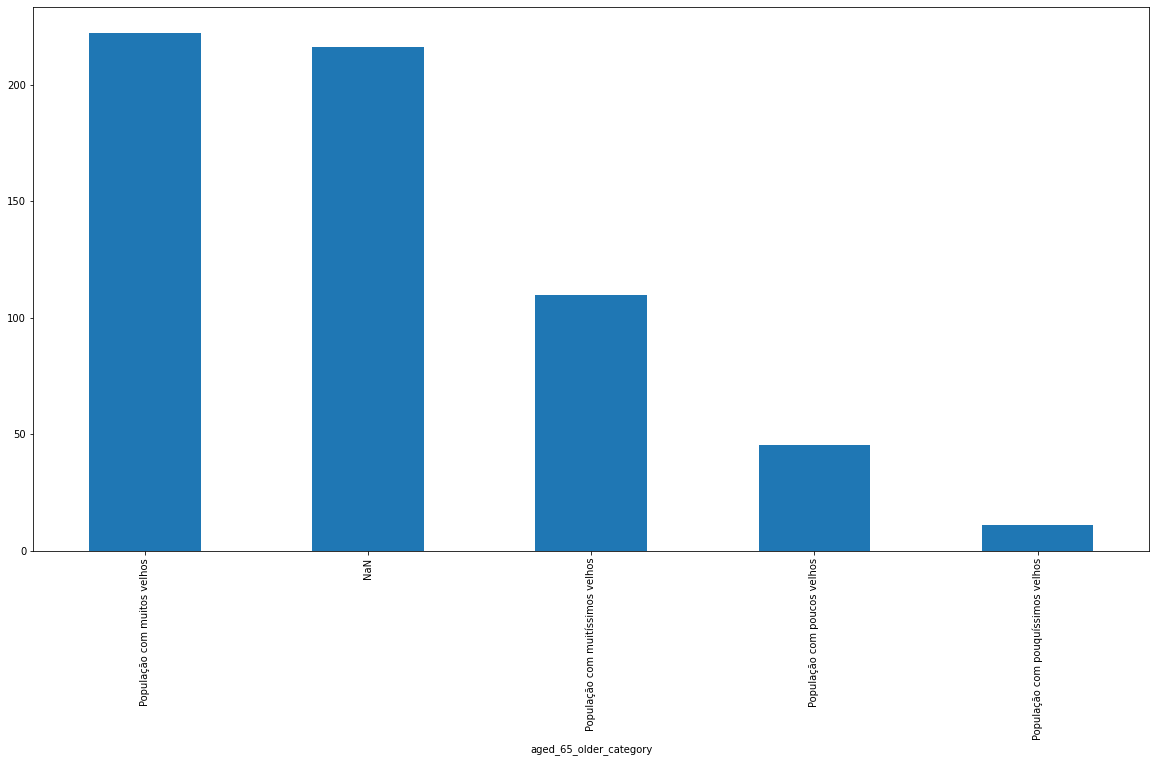

In [ ]:
df.groupby(['aged_65_older_category'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Estatísticas bivariadas

In [ ]:
df.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate
total_cases,1.648167e+13,6.800189e+10,6.936945e+10,3.647147e+11,1.351090e+09,1.269830e+09,1.865702e+10,5.433380e+07,5.592747e+07,4.957595e+08,1.344359e+06,1.367045e+06,-7.577797e+03,8.057632e+08,9.712172e+06,3.487982e+09,4.449772e+07,3.398917e+08,6.693698e+06,1.615916e+09,2.078296e+07,2.110364e+11,3.794074e+13,4.228792e+06,4.154817e+04,1.863711e+11,3.454443e+04,3957.258524,-4.969691e+07,7.795686e+14,4.651181e+14,2.401066e+14,1.421637e+13,7.572493e+12,1.154907e+07,4.851734e+06,-8.334684e+05,1.751583e+09,2.751472e+06,8.601858e+14,-4.677080e+07,9.833606e+05,4.720532e+05,3.024774e+05,3.053253e+08,-1.592956e+06,-1.378330e+07,1.486093e+05,1.551553e+05,-2.106204e+06,3.214475e+06,-1.140249e+05,7.642327e+05,1.311742e+04,6.144752e+06,2.256064e+06,2.283851e+06,4.011084e+04,4.940050e+03
new_cases,6.800189e+10,5.308754e+08,5.209998e+08,1.453069e+09,9.262802e+06,8.232500e+06,5.416482e+07,5.509997e+05,4.969463e+05,1.510597e+06,1.072829e+04,9.477916e+03,1.178944e+02,5.427931e+06,7.597581e+04,2.483791e+07,4.193368e+05,2.832373e+06,4.930985e+04,1.368130e+07,2.175752e+05,1.384778e+09,2.115984e+11,-2.250841e+05,-5.970039e+02,1.200721e+09,-6.277433e+02,132.400680,-3.703540e+05,2.563424e+12,1.371585e+12,5.695897e+11,5.675032e+10,2.964252e+10,-1.148069e+05,-8.735356e+04,-7.896776e+04,-1.824875e+06,2.226179e+04,5.230412e+12,-2.612110e+05,5.314197e+03,2.340984e+03,1.446065e+03,6.201754e+05,-7.925658e+03,-7.323225e+04,1.040016e+03,-1.123971e+02,-1.252103e+04,1.940592e+04,-8.226721e+02,3.995144e+03,6.765669e+01,4.953000e+04,1.175386e+04,1.188578e+04,2.746309e+02,1.014000e+02
new_cases_smoothed,6.936945e+10,5.209998e+08,5.207156e+08,1.464728e+09,9.147232e+06,8.356754e+06,5.571728e+07,4.967642e+05,4.979969e+05,1.542274e+06,1.015789e+04,9.701343e+03,8.055352e+01,5.579099e+06,7.931795e+04,2.537171e+07,4.335423e+05,2.660822e+06,6.691865e+04,1.452703e+07,2.752187e+05,1.399945e+09,2.149529e+11,-2.158371e+05,-6.070475e+02,1.223024e+09,-5.767228e+02,128.793687,-3.684171e+05,2.600994e+12,1.383278e+12,5.744579e+11,5.742770e+10,3.011366e+10,-1.129600e+05,-8.605132e+04,-7.898530e+04,-1.553195e+06,2.201415e+04,5.240249e+12,-2.616430e+05,5.338134e+03,2.364096e+03,1.463107e+03,6.313196e+05,-7.906617e+03,-7.368240e+04,1.049263e+03,-7.642122e+01,-1.268357e+04,1.938668e+04,-8.238662e+02,4.008003e+03,6.782414e+01,4.959108e+04,1.167930e+04,1.185161e+04,2.762167e+02,8.584760e+01
total_deaths,3.647147e+11,1.453069e+09,1.464728e+09,8.033860e+09,2.863930e+07,2.898359e+07,4.473199e+08,1.248527e+06,1.281820e+06,1.459552e+07,4.168745e+04,4.272149e+04,-1.362693e+02,1.994417e+07,1.963413e+05,9.778542e+07,1.161265e+06,6.997568e+06,8.785849e+04,4.169185e+07,2.695697e+05,2.952823e+09,5.274856e+11,-8.768324e+05,-5.262558e+03,2.641400e+09,-4.729838e+03,392.988633,-1.357498e+06,1.331980e+13,8.25289

In [ ]:
df[df.location=='Brazil'].corr(method='pearson')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000e+00,6.861831e-01,8.446046e-01,9.945353e-01,6.264124e-01,7.687388e-01,1.000000e+00,6.861832e-01,8.446046e-01,9.945353e-01,6.264122e-01,7.687376e-01,-4.912677e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.909522e-01,9.909520e-01,NaN,6.449839e-01,6.448438e-01,NaN,NaN,9.701290e-01,9.612538e-01,9.794608e-01,6.397177e-01,9.106320e-01,9.701286e-01,9.612559e-01,9.794496e-01,9.106348e-01,-1.184393e-01,NaN,-4.449587e-15,NaN,3.694819e-15,-7.001336e-16,4.449587e-15,-7.182147e-15,-5.693805e-15,7.001336e-16,-3.164505e-15,3.497052e-15,NaN,7.461787e-15,-7.001336e-16,4.449587e-15,7.971259e-01
new_cases,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591104e-01,7.110935e-01,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591123e-01,7.110978e-01,-4.980023e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.072123e-01,2.072119e-01,NaN,4.021719e-01,4.026709e-01,NaN,NaN,6.470141e-02,3.885682e-02,7.904713e-03,3.492964e-01,8.676893e-02,6.469059e-02,3.884774e-02,8.006578e-03,8.676341e-02,1.066763e-01,NaN,-3.421611e-15,NaN,-4.703274e-15,1.878353e-15,3.421611e-15,4.591120e-15,-3.778773e-15,-1.878353e-15,-5.121371e-15,2.334967e-15,NaN,-3.232511e-15,1.878353e-15,3.421611e-15,7.800308e-01
new_cases_smoothed,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280436e-01,8.694729e-01,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280433e-01,8.694759e-01,-6.307754e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.329274e-01,6.329280e-01,NaN,6.278155e-01,6.280342e-01,NaN,NaN,2.386670e-01,2.141735e-01,1.112976e-01,3.025669e-01,2.915016e-01,2.386579e-01,2.141872e-01,1.112747e-01,2.914904e-01,4.636713e-02,NaN,-9.556645e-16,NaN,-9.647965e-16,-5.016821e-17,1.116436e-15,-2.720988e-16,-5.016821e-17,-1.036495e-15,-9.647965e-16,1.036495e-15,NaN,-2.774468e-15,1.496911e-15,-5.176817e-16,7.950079e-01
total_deaths,9.945353e-01,6.502744e-01,8.245163e-01,1.000000e+00,6.197324e-01,7.536662e-01,9.945353e-01,6.502745e-01,8.245164e-01,1.000000e+00,6.197322e-01,7.536646e-01,-5.072394e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.842116e-01,9.842114e-01,NaN,6.677565e-01,6.676835e-01,NaN,NaN,9.721714e-01,9.606079e-01,9.825432e-01,6.345553e-01,9.076770e-01,9.721714e-01,9.606083e-01,9.825307e-01,9.076805e-01,-5.927827e-01,NaN,-4.539512e-15,NaN,3.864128e-16,6.526661e-15,1.764748e-15,-4.407743e-15,2.250703e-15,8.239549e-15,4.363371e-15,2.671621e-15,NaN,8.239549e-15,-2.250703e-15,-2.537958e-15,7.753398e-01
new_deaths,6.264124e-01,8.591104e-01,7.280436e-01,6.197324e-01,1.000000e+00,8.436478e-01,6.264124e-01,8.591104e-01,7.280435e-01,6.197324e-01,1.000000e+00,8.436503e-01,-3.901546e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.150923e-02,-1.150609e-02,NaN,3.344644e-01,3.348282e-01,NaN,NaN,9.668517e-02,8.514652e-02,-3.820489e-02,4.219971e-01,2.042110e-01,9.667242e-02,8.513308e-02,-3.815864e-02,2.042139e-01,-1.097593e-01,NaN,-2.477708e-15,NaN,3.224846e-15,-2.33718

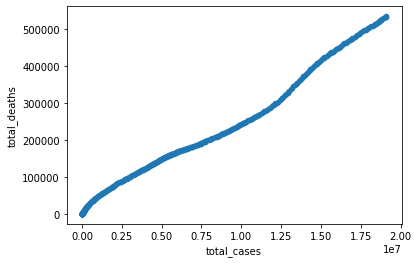

In [ ]:
df[df.location=='Brazil'].plot.scatter(x='total_cases',y='total_deaths')

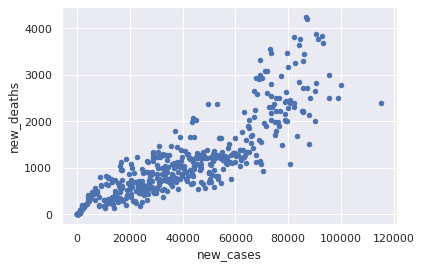

In [192]:
df[df.location=='Brazil'].plot.scatter(x='new_cases',y='new_deaths')

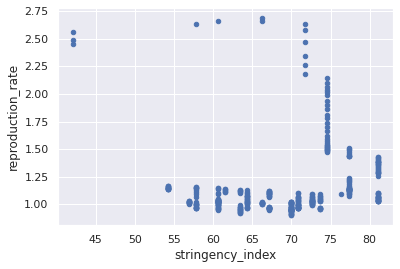

In [196]:
df[df.location=='Brazil'].plot.scatter(x='stringency_index',y='reproduction_rate')

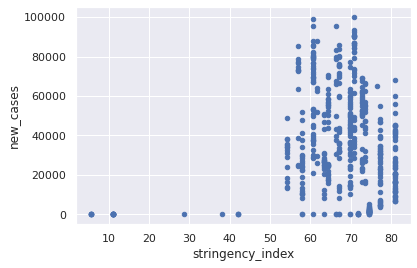

In [194]:
df[df.location=='Brazil'].plot.scatter(x='stringency_index',y='new_cases')

In [199]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


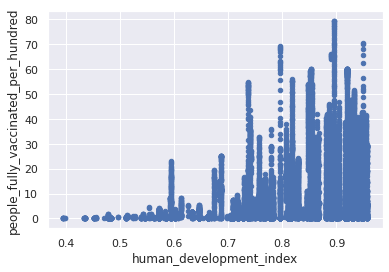

In [205]:
df.plot.scatter(x='human_development_index',y='people_fully_vaccinated_per_hundred')

Segue uma tendência de quanto maior o IDH, maior a taxa de pessoas vacinadas

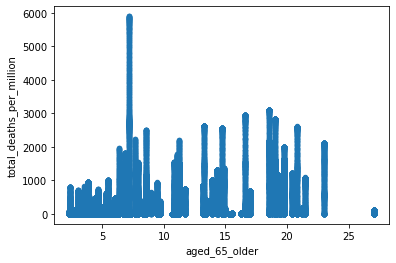

In [ ]:
df.plot.scatter(x='aged_65_older',y='total_deaths_per_million')

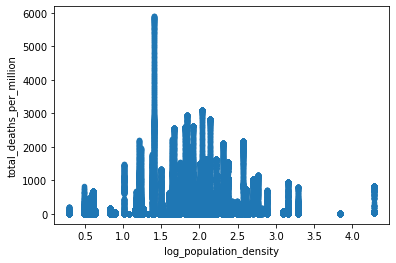

In [ ]:
df.plot.scatter(x='log_population_density',y='total_deaths_per_million')

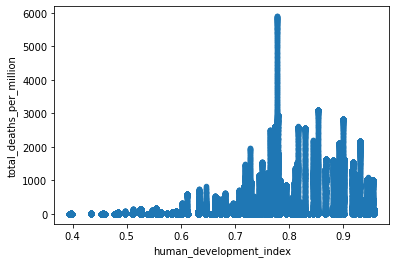

In [ ]:
df.plot.scatter(x='human_development_index',y='total_deaths_per_million')

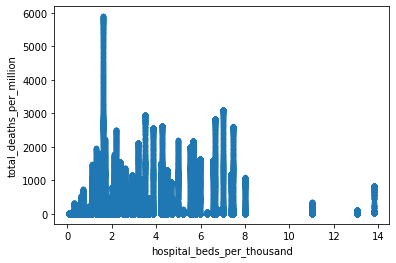

In [ ]:
df.plot.scatter(x='hospital_beds_per_thousand',y='total_deaths_per_million')

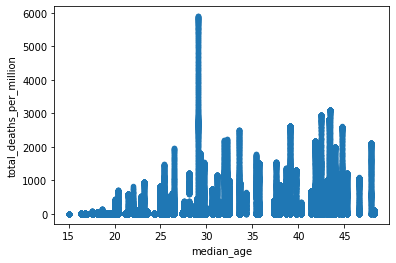

In [ ]:
#median_age
df.plot.scatter(x='median_age',y='total_deaths_per_million')

# **Testes de hipótese**

Nessa etapa inicial vamos analizar, separadamente, nos anos de 2020 e 2021, no Brasil, realizando testes de hipóteses para obtermos resultados de como foi o comportamento da pandemia em cada período de tempo



In [207]:
# Transformar a coluna date no tipo data
df['date'] = pd.to_datetime(df['date'])

In [208]:
# Primeiro ano de pandemia

casos_brasil_inicio = df.loc[(df['date'].dt.year == 2020) & (df['date'].dt.month >= 2)]

casos_brasil_inicio[casos_brasil_inicio.location=='Brazil']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12969,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12970,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12971,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12972,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12973,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13274,BRA,South America,Brazil,2020-12-27,7484285.0,18479.0,35097.857,191139.0,344.0,625.000,35210.321,86.936,165.120,899.226,1.618,2.940,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13275,BRA,South America,Brazil,2020-12-28,7504833.0,20548.0,34459.143,191570.0,431.0,611.286,35306.990,96.669,162.115,901.254,2.028,2.876,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13276,BRA,South America,Brazil,2020-12-29,7563551.0,58718.0,34961.429,192681.0,1111.0,631.714,35583.233,276.243,164.478,906.481,5.227,2.972,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13277,BRA,South Am

In [209]:
# Segundo ano de pandemia

casos_brasil_depois = df.loc[(df['date'].dt.year == 2021)]

casos_brasil_depois[casos_brasil_depois.location=="Brazil"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
13279,BRA,South America,Brazil,2021-01-01,7700578.0,24605.0,36002.571,195411.0,462.0,703.286,36227.886,115.756,169.377,919.324,2.174,3.309,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13280,BRA,South America,Brazil,2021-01-02,7716405.0,15827.0,35799.857,195725.0,314.0,704.286,36302.345,74.459,168.423,920.801,1.477,3.313,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13281,BRA,South America,Brazil,2021-01-03,7733746.0,17341.0,35637.286,196018.0,293.0,697.000,36383.927,81.582,167.658,922.180,1.378,3.279,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13282,BRA,South America,Brazil,2021-01-04,7753752.0,20006.0,35559.857,196561.0,543.0,713.000,36478.046,94.120,167.294,924.734,2.555,3.354,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13283,BRA,South America,Brazil,2021-01-05,7810400.0,56648.0,35264.143,197732.0,1171.0,721.571,36744.551,266.504,165.903,930.243,5.509,3.395,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467,BRA,South America,Brazil,2021-07-08,18962762.0,53725.0,48636.857,530179.0,1639.0,1440.571,89211.586,252.753,228.815,2494.263,7.711,6.777,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111477691.0,83713097.0,29493829.0,1375862.0,1242514.0,52.45,39.38,13.88,5845.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13468,BRA,South America,Brazil,2021-07-09,19020499.0,57737.0,47575.714,531688.0,1509.0,1390.857,89483.214,271.628,223.823,2501.362,7.099,6.543,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112774302.0,85201397.0,29901792.0,1296611.0,1307672.0,53.06,40.08,14.07,6152.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
13469,BRA,South America,Brazil,2021-07-10,19

In [ ]:
casos_brasil_inicio['new_deaths_per_million'].describe()

count    37745.000000
mean         1.199661
std          3.520077
min        -76.445000
25%          0.000000
50%          0.088000
75%          0.921000
max        218.329000
Name: new_deaths_per_million, dtype: float64

In [ ]:
casos_brasil_depois['new_deaths_per_million'].describe()

count    26760.000000
mean         2.008044
std          4.174916
min        -20.593000
25%          0.000000
50%          0.283000
75%          2.191250
max        104.885000
Name: new_deaths_per_million, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


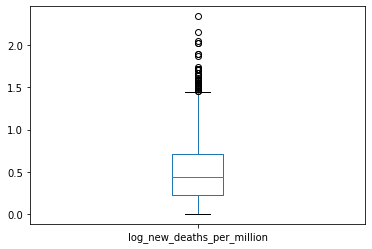

In [ ]:
casos_brasil_inicio['log_new_deaths_per_million'] = casos_brasil_inicio['new_deaths_per_million'].apply(np.log10)
casos_brasil_inicio[casos_brasil_inicio['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


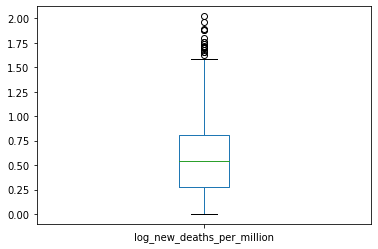

In [ ]:
casos_brasil_depois['log_new_deaths_per_million'] = casos_brasil_depois['new_deaths_per_million'].apply(np.log10)
casos_brasil_depois[casos_brasil_depois['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


*   H0: O número de mortes por milhão não diminuiu em 2021

*   H1: O número de mortes por milhão diminuiu em 2021




In [ ]:
stats.shapiro(casos_brasil_inicio['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.34480202198028564, 0.0)

In [ ]:
stats.shapiro(casos_brasil_depois['new_deaths_per_million'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5199995040893555, 0.0)

Os p-values obtidos foram muito baixos, portanto, ambas amostras não seguem uma distribuição normal. Então, usaremos o teste mann-whitney para amostras não pareadas.

In [210]:
stats.mannwhitneyu(casos_brasil_inicio['new_deaths_per_million'], casos_brasil_depois['new_deaths_per_million'], alternative='less')

MannwhitneyuResult(statistic=1146159665.5, pvalue=7.302781757853576e-122)

O p-value possue um valor menos do que o nível de significância (geralmente adotado como 0,05) portanto, ele rejeita a hipótese alternativa de que os casos novos de morte por covid diminuiram em 2021.

################################################################################

## Agora, iremos verificar a eficácia das medidas de restrição adotadas pelos governadores. Estratificamos o dataset em alta estringência e baixa estringência.

H0: A taxa de reprodução do virus não com medidas de restrição baixa não mudou ou esteve maior do que com altas medidas de restrições.
H1: A taxa de reprodução do virus diminuiu com altas medidas de restrições.

In [217]:
strin_brasil_Hi = df.loc[(df['stringency_category'] == 'Alta_estringencia')]

strin_brasil_Hi = strin_brasil_Hi[strin_brasil_Hi.location=="Brazil"]

In [218]:
strin_brasil_Lo = df.loc[(df['stringency_category'] == 'Nenhum_estringencia') | (df['stringency_category'] == 'Baixa_estringencia')]

strin_brasil_Lo = strin_brasil_Lo[strin_brasil_Lo.location=="Brazil"]

In [ ]:
strin_brasil_Lo['reproduction_rate'].describe()

count    54.000000
mean      1.177963
std       0.393889
min       0.970000
25%       1.002500
50%       1.080000
75%       1.150000
max       2.630000
Name: reproduction_rate, dtype: float64

In [ ]:
strin_brasil_Hi['reproduction_rate'].describe()

count    125.000000
mean       1.328880
std        0.270042
min        1.030000
25%        1.110000
50%        1.280000
75%        1.480000
max        2.140000
Name: reproduction_rate, dtype: float64

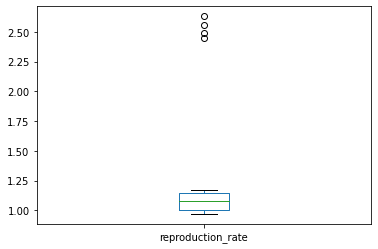

In [ ]:
strin_brasil_Lo['reproduction_rate'].plot(kind='box')

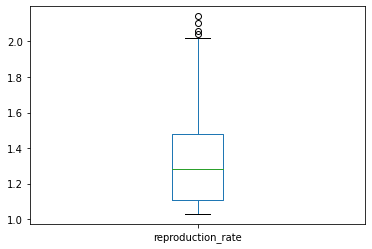

In [ ]:
strin_brasil_Hi['reproduction_rate'].plot(kind='box')

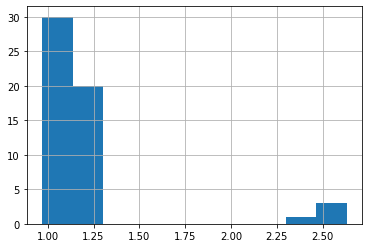

In [ ]:
strin_brasil_Lo['reproduction_rate'].dropna().hist()

In [ ]:
stats.jarque_bera(strin_brasil_Lo['reproduction_rate'].dropna())

(227.05336634108215, 0.0)

In [ ]:
stats.shapiro(strin_brasil_Lo['reproduction_rate'].dropna())

(0.4544994831085205, 7.132766599582396e-13)

O test de shapiro nos mostrou que o p-value possui um valor menor do que o nível de significância (0,005), portanto, para os dados correspondetes a baixa estringência a sua distribuição não segue uma normal.

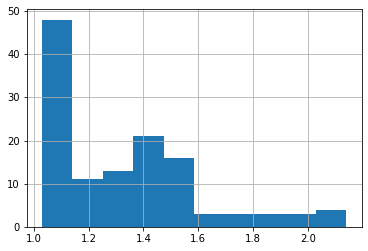

In [ ]:
strin_brasil_Hi['reproduction_rate'].dropna().hist()

In [ ]:
stats.shapiro(strin_brasil_Hi['reproduction_rate'].dropna())

(0.8804649710655212, 1.3343123050901795e-08)

O test de shapiro nos mostrou que o p-value possui um valor menor do que o nível de significância (0,005), portanto, para os dados correspondetes a alta estringência a sua distribuição não segue uma normal.

In [219]:
stats.mannwhitneyu(strin_brasil_Lo['reproduction_rate'], strin_brasil_Hi['reproduction_rate'], alternative="greater")

MannwhitneyuResult(statistic=1852.5, pvalue=0.9999997906349755)

Segundo o test de mann-whitney, obteve-se um p-value maior do que o nível de significância. Isso quer dizer que ele falha em rejeitar a hipótese alternativa.

In [ ]:
strin_brasil_Hi['new_cases_per_million'].describe()

count    125.000000
mean      95.799072
std       79.163854
min        1.520000
25%       22.234000
50%       80.570000
75%      151.431000
max      319.252000
Name: new_cases_per_million, dtype: float64

In [ ]:
strin_brasil_Lo['new_cases_per_million'].dropna().describe()

count     56.000000
mean     147.522482
std      110.078231
min        0.000000
25%       65.740250
50%      130.806000
75%      181.245500
max      402.410000
Name: new_cases_per_million, dtype: float64

In [ ]:
stats.shapiro(strin_brasil_Hi['new_cases_per_million'].dropna())

(0.9219449162483215, 2.0627780941140372e-06)

# **Análise exploratória dos dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101998 entries, 0 to 101997
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               101998 non-null  object        
 1   continent                              97230 non-null   object        
 2   location                               101998 non-null  object        
 3   date                                   101998 non-null  datetime64[ns]
 4   total_cases                            98192 non-null   float64       
 5   new_cases                              98189 non-null   float64       
 6   new_cases_smoothed                     97179 non-null   float64       
 7   total_deaths                           87983 non-null   float64       
 8   new_deaths                             88139 non-null   float64       
 9   new_deaths_smoothed                    97179 non

In [220]:
df['iso_code'] = df['iso_code'].astype('category')
df['continent'] = df['continent'].astype('category')
df['location'] = df['location'].astype('category')
df['date'] = df['date'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

In [ ]:
df.dtypes

iso_code                                 category
continent                                category
location                                 category
date                                     category
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
reproduction_rate                         float64
icu_patients                              float64
icu_patients_per_million                  float64
hosp_patients                             float64


In [ ]:
df['continent'].cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [ ]:
df['iso_code'].cat.categories

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       ...
       'VEN', 'VGB', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=231)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
101993,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,107.285,136.514,3.768,2.124,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12811.0,720873.0,48.501,0.862,8053.0,0.542,0.198,5.1,tests performed,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101994,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,119.213,140.215,3.700,2.336,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,4497.970,120.232,126.758,143.040,2.826,2.566,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101997,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [ ]:
df.shape

(101998, 60)

In [ ]:
df.isnull().sum()

iso_code                                      0
continent                                  4768
location                                      0
date                                          0
total_cases                                3806
new_cases                                  3809
new_cases_smoothed                         4819
total_deaths                              14015
new_deaths                                13859
new_deaths_smoothed                        4819
total_cases_per_million                    4328
new_cases_per_million                      4331
new_cases_smoothed_per_million             5336
total_deaths_per_million                  14524
new_deaths_per_million                    14368
new_deaths_smoothed_per_million            5336
reproduction_rate                         19771
icu_patients                              91741
icu_patients_per_million                  91741
hosp_patients                             89262
hosp_patients_per_million               

# **Pré processamento**

Vamos excluir as seguintes colunas, pois possuem de 80 à 90 porcento de seus dados ausentes.

In [134]:
df_2 = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                      'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million'])

In [135]:
# Exluir do dataset colunasc que possuem ao menos 70% dos dados ausentes
df_2 = df.dropna(thresh=0.7*len(df), axis=1)

In [136]:
df_remove =  df_2[(df_2.continent=="Asia") | (df_2.continent=="Europe") | (df_2.continent=="North America") | (df_2.continent=="South America") | (df_2.continent=="Africa") | (df_2.continent=="Oceania")]

In [137]:
df_2 = df_remove

Uma forma de eliminar os dados ausentes da coluna 'location'

In [ ]:
df_2.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                         3801
new_cases                           3809
new_cases_smoothed                  4766
total_deaths                       13845
new_deaths                         13846
new_deaths_smoothed                 4766
total_cases_per_million             3801
new_cases_per_million               3809
new_cases_smoothed_per_million      4766
total_deaths_per_million           13845
new_deaths_per_million             13846
new_deaths_smoothed_per_million     4766
reproduction_rate                  15538
stringency_index                   11669
population                           134
population_density                  3033
median_age                          6714
aged_65_older                       7736
aged_70_older                       7217
gdp_per_capita                      6345
cardiovasc_death

In [ ]:
df_2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,0.5,64.83,0.511


# Data imputation

Alguns exemplos de imputação de dados. Os metodos usados foram o de substituir pela média, pela mediana e o baseado nos 3 vizinhos mais próximos.

## **Média**

In [ ]:
print(df['total_cases'].mean())
print(df['total_cases'].median())

1105662.5528963662
14093.0


In [ ]:
df_2['total_cases'].fillna(df_2['total_cases'].mean(), inplace=True)

In [ ]:
df_2.isnull().sum()

In [ ]:
print(df_2['total_cases'].mean())
print(df_2['total_cases'].median())

365155.5727557504
14763.0


In [ ]:
df.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.814136,0.890075,0.956082,0.750640,0.839802,0.754996,0.649933,0.676503,0.722946,0.639636,0.715023,0.035406,0.781660,0.526338,0.767780,0.534426,0.698847,0.445634,0.752358,0.473612,0.786584,0.884232,0.553724,0.426867,0.792163,0.430035,0.347978,-0.326699,0.712246,0.740739,0.714656,0.701453,0.757256,0.128897,0.112932,0.056472,0.198481,0.169020,0.501034,0.004510,0.292378,0.275639,0.267679,0.293054,-0.277299,-0.178577,0.000020,0.184269,0.009579,0.225348,0.102056,0.245855,0.301603,0.415391
new_cases,0.814136,1.000000,0.921887,0.757158,0.870352,0.857051,0.547626,0.851736,0.705532,0.503243,0.765036,0.721515,0.276730,0.836310,0.617820,0.838175,0.645120,0.524601,0.577922,0.768316,0.632009,0.750636,0.692733,0.340046,0.357922,0.718402,0.333220,0.554078,-0.539953,0.536048,0.573294,0.511355,0.602292,0.628965,-0.041909,-0.060028,-0.162952,0.129904,0.325347,0.505528,0.034167,0.323428,0.302775,0.294418,0.302894,-0.302735,-0.167632,0.026248,0.204551,0.045757,0.295839,0.126942,0.270886,0.322865,0.492546
new_cases_smoothed,0.890075,0.921887,1.000000,0.826191,0.853027,0.923960,0.614579,0.753419,0.787277,0.570741,0.742476,0.797054,0.265367,0.888681,0.678121,0.893296,0.705757,0.872558,0.662576,0.918684,0.706361,0.776164,0.726235,0.361712,0.371314,0.761185,0.362813,0.595373,-0.581215,0.557872,0.597788,0.532819,0.609047,0.663364,-0.037154,-0.055193,-0.161690,0.142014,0.322399,0.526311,0.006022,0.322103,0.306550,0.298600,0.312619,-0.309018,-0.183684,0.015401,0.214571,0.032290,0.291778,0.108950,0.265276,0.326742,0.521978
total_deaths,0.956082,0.757158,0.826191,1.000000,0.773754,0.838767,0.622226,0.512002,0.528191,0.735346,0.647379,0.647724,-0.005501,0.805822,0.408280,0.798739,0.451517,0.672830,0.272054,0.760616,0.353894,0.726926,0.791647,0.405311,0.305614,0.723223,0.296803,0.331790,-0.319404,0.659661,0.689192,0.654313,0.672732,0.710261,0.054745,0.048629,-0.014815,0.131089,0.099934,0.543226,-0.032359,0.284656,0.321720,0.308881,0.249320,-0.266582,-0.127000,0.022735,0.237674,0.046441,0.263389,0.106280,0.220909,0.274186,0.368020
new_deaths,0.750640,0.870352,0.853027,0.773754,1.000000,0.912275,0.441200,0.641467,0.574851,0.523835,0.900687,0.729503,0.104603,0.896207,0.677087,0.901812,0.711446,0.613884,0.642291,0.798925,0.661659,0.622278,0.559483,0.173969,0.190589,0.602032,0.179673,0.533687,-0.527057,0.476348,0.523586,0.465096,0.549013,0.567530,-0.106506,-0.115327,-0.210841,0.068909,0.302953,0.500828,-0.000609,0.282039,0.311197,0.300736,0.225947,-0.242697,-0.089541,0.088315,0.216278,0.094742,0.330797,0.106142,0.209236,0.254572,0.552496
new_deaths_smoothed,0.839802,0.857051,0.923960,0.838767,0.912275,1.000000,0.557376,0.664478,0.686343,0.579295,0.799433,0.872528,0.131245,0.954928,0.731535,0.964784,0.769254,0.881843,0.653764,0.922893,0.687385,0.673994,0.626644,0.242434,0.236327,0.661074,0.233570,0.585996,-0.573097,0.505448,0.557

In [ ]:
df_2.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.796094,0.880288,0.950697,0.723847,0.825301,0.770546,0.647204,0.680615,0.731835,0.630499,0.713823,0.034450,0.169020,0.460308,0.008441,0.293947,0.274049,0.266169,0.293289,-0.178274,-0.004500,0.184790,0.100591,0.250837,0.305575
new_cases,0.796094,1.000000,0.912768,0.729184,0.854583,0.840953,0.556007,0.867635,0.715519,0.503284,0.767958,0.722722,0.277487,0.325347,0.458559,0.038653,0.325413,0.301524,0.293237,0.303341,-0.166989,0.021641,0.205267,0.125746,0.276379,0.327262
new_cases_smoothed,0.880288,0.912768,1.000000,0.806522,0.835079,0.915877,0.628035,0.760892,0.802786,0.575556,0.742858,0.803689,0.266120,0.322399,0.482276,0.010293,0.324172,0.305373,0.297496,0.313088,-0.183329,0.010750,0.215471,0.107544,0.270728,0.331273
total_deaths,0.950697,0.729184,0.806522,1.000000,0.749733,0.822630,0.638822,0.506538,0.529158,0.747597,0.640875,0.647153,-0.006989,0.099934,0.496036,-0.028491,0.287083,0.321641,0.308593,0.250320,-0.126660,0.017055,0.238595,0.105111,0.226573,0.278625
new_deaths,0.723847,0.854583,0.835079,0.749733,1.000000,0.901663,0.450536,0.649180,0.582629,0.527691,0.916513,0.737032,0.103494,0.302953,0.447970,0.004101,0.284720,0.311344,0.300647,0.226784,-0.088578,0.082787,0.217324,0.105162,0.215297,0.259178
new_deaths_smoothed,0.825301,0.840953,0.915877,0.822630,0.901663,1.000000,0.568297,0.666860,0.695582,0.586568,0.804684,0.885568,0.130486,0.327737,0.486194,-0.030939,0.284297,0.305990,0.296174,0.243355,-0.119110,0.008129,0.224070,0.084339,0.220812,0.270186
total_cases_per_million,0.770546,0.556007,0.628035,0.638822,0.450536,0.568297,1.000000,0.689290,0.818989,0.932537,0.545204,0.700908,-0.061654,0.114526,-0.138156,0.069757,0.380465,0.332775,0.334517,0.420109,-0.226007,0.092149,0.311586,0.282756,0.398653,0.434874
new_cases_per_million,0.647204,0.867635,0.760892,0.506538,0.649180,0.666860,0.689290,1.000000,0.859701,0.625264,0.741946,0.753774,0.248170,0.301166,0.056794,0.056862,0.395761,0.344388,0.343216,0.380053,-0.196543,0.068334,0.310389,0.253096,0.373106,0.413696
new_cases_smoothed_per_million,0.680615,0.715519,0.802786,0.529158,0.582629,0.695582,0.818989,0.859701,1.000000,0.749478,0.686372,0.832555,0.210419,0.292209,-0.057996,0.055271,0.416362,0.365550,0.367171,0.430208,-0.229489,0.096428,0.341079,0.285540,0.407981,0.452736
total_deaths_per_million,0.731835,0.503284,0.575556,0.747597,0.527691,0.586568,0.932537,0.625264,0.749478,1.000000,0.596520,0.720868,-0.092025,0.052491,-0.133277,0.027695,0.405495,0.413421,0.411786,0.405807,-0.204745,0.093760,0.408457,0.309316,0.411799,0.440925


## **Mediana**

In [221]:
df_2['total_cases'].fillna(df_2['total_cases'].median(), inplace=True)

In [222]:
print(df_2['total_cases'].mean())
print(df_2['total_cases'].median())

351381.56764373137
12815.0


In [223]:
df.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.814136,0.890075,0.956082,0.750640,0.839802,0.754996,0.649933,0.676503,0.722946,0.639636,0.715023,0.035406,0.781660,0.526338,0.767780,0.534426,0.698847,0.445634,0.752358,0.473612,0.786584,0.884232,0.553724,0.426867,0.792163,0.430035,0.347978,-0.326699,0.712246,0.740739,0.714656,0.701453,0.757256,0.128897,0.112932,0.056472,0.198481,0.169020,0.501034,0.004510,0.292378,0.275639,0.267679,0.293054,-0.277299,-0.178577,0.000020,0.184269,0.009579,0.225348,0.102056,0.245855,0.301603,0.415391
new_cases,0.814136,1.000000,0.921887,0.757158,0.870352,0.857051,0.547626,0.851736,0.705532,0.503243,0.765036,0.721515,0.276730,0.836310,0.617820,0.838175,0.645120,0.524601,0.577922,0.768316,0.632009,0.750636,0.692733,0.340046,0.357922,0.718402,0.333220,0.554078,-0.539953,0.536048,0.573294,0.511355,0.602292,0.628965,-0.041909,-0.060028,-0.162952,0.129904,0.325347,0.505528,0.034167,0.323428,0.302775,0.294418,0.302894,-0.302735,-0.167632,0.026248,0.204551,0.045757,0.295839,0.126942,0.270886,0.322865,0.492546
new_cases_smoothed,0.890075,0.921887,1.000000,0.826191,0.853027,0.923960,0.614579,0.753419,0.787277,0.570741,0.742476,0.797054,0.265367,0.888681,0.678121,0.893296,0.705757,0.872558,0.662576,0.918684,0.706361,0.776164,0.726235,0.361712,0.371314,0.761185,0.362813,0.595373,-0.581215,0.557872,0.597788,0.532819,0.609047,0.663364,-0.037154,-0.055193,-0.161690,0.142014,0.322399,0.526311,0.006022,0.322103,0.306550,0.298600,0.312619,-0.309018,-0.183684,0.015401,0.214571,0.032290,0.291778,0.108950,0.265276,0.326742,0.521978
total_deaths,0.956082,0.757158,0.826191,1.000000,0.773754,0.838767,0.622226,0.512002,0.528191,0.735346,0.647379,0.647724,-0.005501,0.805822,0.408280,0.798739,0.451517,0.672830,0.272054,0.760616,0.353894,0.726926,0.791647,0.405311,0.305614,0.723223,0.296803,0.331790,-0.319404,0.659661,0.689192,0.654313,0.672732,0.710261,0.054745,0.048629,-0.014815,0.131089,0.099934,0.543226,-0.032359,0.284656,0.321720,0.308881,0.249320,-0.266582,-0.127000,0.022735,0.237674,0.046441,0.263389,0.106280,0.220909,0.274186,0.368020
new_deaths,0.750640,0.870352,0.853027,0.773754,1.000000,0.912275,0.441200,0.641467,0.574851,0.523835,0.900687,0.729503,0.104603,0.896207,0.677087,0.901812,0.711446,0.613884,0.642291,0.798925,0.661659,0.622278,0.559483,0.173969,0.190589,0.602032,0.179673,0.533687,-0.527057,0.476348,0.523586,0.465096,0.549013,0.567530,-0.106506,-0.115327,-0.210841,0.068909,0.302953,0.500828,-0.000609,0.282039,0.311197,0.300736,0.225947,-0.242697,-0.089541,0.088315,0.216278,0.094742,0.330797,0.106142,0.209236,0.254572,0.552496
new_deaths_smoothed,0.839802,0.857051,0.923960,0.838767,0.912275,1.000000,0.557376,0.664478,0.686343,0.579295,0.799433,0.872528,0.131245,0.954928,0.731535,0.964784,0.769254,0.881843,0.653764,0.922893,0.687385,0.673994,0.626644,0.242434,0.236327,0.661074,0.233570,0.585996,-0.573097,0.505448,0.557

In [224]:
df_2.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.796094,0.880281,0.950685,0.723846,0.825293,0.770546,0.647204,0.680608,0.731825,0.630500,0.713817,0.034450,0.169088,0.441050,0.008476,0.291702,0.272242,0.264431,0.289281,-0.177521,-0.005031,0.182889,0.100284,0.245646,0.304867
new_cases,0.796094,1.000000,0.912768,0.729184,0.854583,0.840953,0.556007,0.867635,0.715519,0.503284,0.767958,0.722722,0.277487,0.325347,0.458559,0.038653,0.325413,0.301524,0.293237,0.303341,-0.166989,0.021641,0.205267,0.125746,0.276379,0.327262
new_cases_smoothed,0.880281,0.912768,1.000000,0.806522,0.835079,0.915877,0.628035,0.760892,0.802786,0.575556,0.742858,0.803689,0.266120,0.322399,0.482276,0.010293,0.324172,0.305373,0.297496,0.313088,-0.183329,0.010750,0.215471,0.107544,0.270728,0.331273
total_deaths,0.950685,0.729184,0.806522,1.000000,0.749733,0.822630,0.638822,0.506538,0.529158,0.747597,0.640875,0.647153,-0.006989,0.099934,0.496036,-0.028491,0.287083,0.321641,0.308593,0.250320,-0.126660,0.017055,0.238595,0.105111,0.226573,0.278625
new_deaths,0.723846,0.854583,0.835079,0.749733,1.000000,0.901663,0.450536,0.649180,0.582629,0.527691,0.916513,0.737032,0.103494,0.302953,0.447970,0.004101,0.284720,0.311344,0.300647,0.226784,-0.088578,0.082787,0.217324,0.105162,0.215297,0.259178
new_deaths_smoothed,0.825293,0.840953,0.915877,0.822630,0.901663,1.000000,0.568297,0.666860,0.695582,0.586568,0.804684,0.885568,0.130486,0.327737,0.486194,-0.030939,0.284297,0.305990,0.296174,0.243355,-0.119110,0.008129,0.224070,0.084339,0.220812,0.270186
total_cases_per_million,0.770546,0.556007,0.628035,0.638822,0.450536,0.568297,1.000000,0.689290,0.818989,0.932537,0.545204,0.700908,-0.061654,0.114526,-0.138156,0.069757,0.380465,0.332775,0.334517,0.420109,-0.226007,0.092149,0.311586,0.282756,0.398653,0.434874
new_cases_per_million,0.647204,0.867635,0.760892,0.506538,0.649180,0.666860,0.689290,1.000000,0.859701,0.625264,0.741946,0.753774,0.248170,0.301166,0.056794,0.056862,0.395761,0.344388,0.343216,0.380053,-0.196543,0.068334,0.310389,0.253096,0.373106,0.413696
new_cases_smoothed_per_million,0.680608,0.715519,0.802786,0.529158,0.582629,0.695582,0.818989,0.859701,1.000000,0.749478,0.686372,0.832555,0.210419,0.292209,-0.057996,0.055271,0.416362,0.365550,0.367171,0.430208,-0.229489,0.096428,0.341079,0.285540,0.407981,0.452736
total_deaths_per_million,0.731825,0.503284,0.575556,0.747597,0.527691,0.586568,0.932537,0.625264,0.749478,1.000000,0.596520,0.720868,-0.092025,0.052491,-0.133277,0.027695,0.405495,0.413421,0.411786,0.405807,-0.204745,0.093760,0.408457,0.309316,0.411799,0.440925


## **Método baseado em KNN**

In [138]:
df_knn = df_2[df_2.location=="Brazil"]

In [ ]:
df_knn = df_knn.drop(columns=["iso_code", "continent", "location", "date"])

df_knn

In [140]:
data_frame = df_knn

In [141]:
df_knn = KNN(k=3).fit_transform(df_knn)

Imputing row 1/503 with 9 missing, elapsed time: 0.067
Imputing row 101/503 with 0 missing, elapsed time: 0.070
Imputing row 201/503 with 0 missing, elapsed time: 0.071
Imputing row 301/503 with 0 missing, elapsed time: 0.071
Imputing row 401/503 with 0 missing, elapsed time: 0.072
Imputing row 501/503 with 1 missing, elapsed time: 0.073


In [142]:
data_frame = pd.DataFrame(data_frame)

In [ ]:
list(data_frame.columns)

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [143]:
df_3 = pd.DataFrame(data=df_knn[0:,0:],columns=['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index'])

In [ ]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1.0,1.0,0.327000,2.427664,1.650550,0.0,0.005,0.005,0.001287,0.011488,0.007729,0.0,2.489771,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
1,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
2,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
3,2.0,1.0,0.329979,2.426451,1.650082,0.0,0.009,0.005,0.001308,0.011482,0.007727,0.0,2.489719,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
4,2.0,0.0,0.329869,2.427164,1.650422,0.0,0.009,0.000,0.001307,0.011485,0.007728,0.0,2.489689,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765


In [20]:
df_3.isnull().sum()

total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
hospital_beds_per_thousand         0
life_expectancy                    0
human_development_index            0
dtype: int64

In [ ]:
print(df_3['total_cases'].mean())
print(df_3['total_cases'].median())

6842158.029821074
5566049.0


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 101997
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         97230 non-null  object 
 1   continent                        97230 non-null  object 
 2   location                         97230 non-null  object 
 3   date                             97230 non-null  object 
 4   total_cases                      93429 non-null  float64
 5   new_cases                        93421 non-null  float64
 6   new_cases_smoothed               92464 non-null  float64
 7   total_deaths                     83385 non-null  float64
 8   new_deaths                       83384 non-null  float64
 9   new_deaths_smoothed              92464 non-null  float64
 10  total_cases_per_million          93429 non-null  float64
 11  new_cases_per_million            93421 non-null  float64
 12  new_cases_smoothe

In [144]:
df_2_brasil = df_2[df_2.location=="Brazil"]

In [145]:
df_2_brasil = df_2_brasil.reset_index(drop=True)

In [146]:
df_3['iso_code'] = df_2_brasil['iso_code']
df_3['continent'] = df_2_brasil['continent']
df_3['location'] = df_2_brasil['location']
df_3['date'] = df_2_brasil['date']

In [24]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,continent,location,date
0,1.0,1.0,0.327000,2.427664,1.650550,0.0,0.005,0.005,0.001287,0.011488,0.007729,0.0,2.489771,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-26
1,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-27
2,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-28
3,2.0,1.0,0.329979,2.426451,1.650082,0.0,0.009,0.005,0.001308,0.011482,0.007727,0.0,2.489719,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-29
4,2.0,0.0,0.329869,2.427164,1.650422,0.0,0.009,0.000,0.001307,0.011485,0.007728,0.0,2.489689,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-01


In [ ]:
df_2_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765


In [26]:
df_3.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.716637,0.878155,0.999856,0.643480,0.749328,1.000000,0.716637,0.878155,0.999856,0.643480,0.749333,-0.590587,-0.465393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,0.716637,1.000000,0.817899,0.716507,0.900702,0.745195,0.716637,1.000000,0.817899,0.716507,0.900702,0.745230,-0.405083,-0.132051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,0.878155,0.817899,1.000000,0.878016,0.773479,0.900357,0.878155,0.817899,1.000000,0.878016,0.773479,0.900370,-0.506899,-0.180133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,0.999856,0.716507,0.878016,1.000000,0.643624,0.749308,0.999856,0.716507,0.878016,1.000000,0.643624,0.749313,-0.590580,-0.465591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,0.643480,0.900702,0.773479,0.643624,1.000000,0.848424,0.643480,0.900702,0.773479,0.643624,1.000000,0.848460,-0.386720,0.039956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,0.749328,0.745195,0.900357,0.749308,0.848424,1.000000,0.749328,0.745195,0.900357,0.749308,0.848424,1.000000,-0.467557,0.034211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,1.000000,0.716637,0.878155,0.999856,0.643480,0.749328,1.000000,0.716637,0.878155,0.999856,0.643480,0.749333,-0.590587,-0.465393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,0.716637,1.000000,0.817899,0.716507,0.900702,0.745195,0.716637,1.000000,0.817899,0.716507,0.900702,0.745230,-0.405083,-0.132051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,0.878155,0.817899,1.000000,0.878016,0.773479,0.900357,0.878155,0.817899,1.000000,0.878016,0.773479,0.900370,-0.506899,-0.180133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths_per_million,0.999856,0.716507,0.878016,1.000000,0.643624,0.749308,0.999856,0.716507,0.878016,1.000000,0.643624,0.749313,-0.590580,-0.465591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2_brasil.corr(method='spearman')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.716637,0.874450,1.000000,0.600799,0.741725,1.000000,0.716637,0.874450,1.000000,0.600799,0.741730,-0.540631,-0.441257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,0.716637,1.000000,0.812686,0.682607,0.888033,0.737751,0.716637,1.000000,0.812686,0.682607,0.888033,0.737788,-0.351926,-0.116231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,0.874450,0.812686,1.000000,0.862386,0.746254,0.897346,0.874450,0.812686,1.000000,0.862386,0.746254,0.897359,-0.454433,-0.188165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,1.000000,0.682607,0.862386,1.000000,0.600799,0.716925,1.000000,0.682607,0.862386,1.000000,0.600799,0.716931,-0.531986,-0.637275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,0.600799,0.888033,0.746254,0.600799,1.000000,0.830565,0.600799,0.888033,0.746254,0.600799,1.000000,0.830606,-0.318384,-0.045149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,0.741725,0.737751,0.897346,0.716925,0.830565,1.000000,0.741725,0.737751,0.897346,0.716925,0.830565,1.000000,-0.407185,0.064995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,1.000000,0.716637,0.874450,1.000000,0.600799,0.741725,1.000000,0.716637,0.874450,1.000000,0.600799,0.741730,-0.540631,-0.441257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,0.716637,1.000000,0.812686,0.682607,0.888033,0.737751,0.716637,1.000000,0.812686,0.682607,0.888033,0.737788,-0.351926,-0.116231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,0.874450,0.812686,1.000000,0.862386,0.746254,0.897346,0.874450,0.812686,1.000000,0.862386,0.746254,0.897359,-0.454433,-0.188165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths_per_million,1.000000,0.682607,0.862386,1.000000,0.600799,0.716925,1.000000,0.682607,0.862386,1.000000,0.600799,0.716931,-0.531986,-0.637275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Detecção de outliers**

In [30]:
df_3[df_3.duplicated()].sort_values('total_cases').head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,continent,location,date,new_deaths_log


In [32]:
df_3['new_deaths'].describe()

count     503.000000
mean     1062.157874
std       854.621538
min         0.000000
25%       495.500000
50%       888.000000
75%      1309.000000
max      4249.000000
Name: new_deaths, dtype: float64

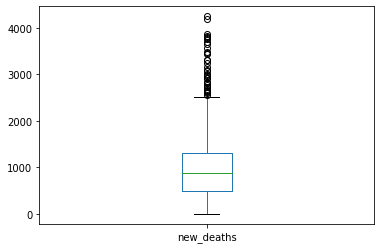

In [33]:
df_3['new_deaths'].plot.box()

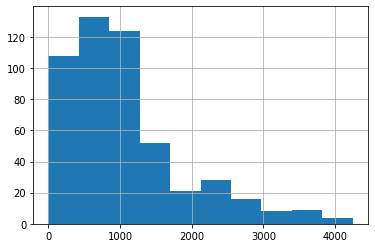

In [34]:
df_3['new_deaths'].hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



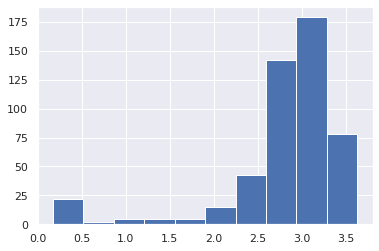

In [111]:
from numpy import log10

#df['log_total_cases'] = df['total_cases'].apply(np.log10)
#df[df['log_total_cases'] > 0]['log_total_cases'].hist()

df_3['new_deaths_log'] = log10(df_3['new_deaths'])
df_3[df_3['new_deaths_log'] > 0]['new_deaths_log'].hist()

In [112]:
from numpy import abs

MAD = abs(df_3['new_deaths_log'] - df_3['new_deaths_log'].median()).median()*(1/0.6745)

print(MAD)

0.30611399266034384


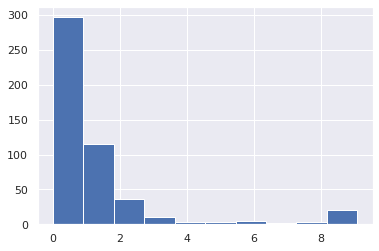

In [113]:
# Plotar o z-score robusto

(abs(df_3[df_3['new_deaths_log'] > 0]['new_deaths_log']-df_3[df_3['new_deaths_log'] > 0]['new_deaths_log'].median())/MAD).hist()

In [114]:
df_3[abs(df_3['new_deaths_log']-df_3['new_deaths_log'].median())/MAD > 5]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,continent,location,date,new_deaths_log
0,1.0,1.0,0.327000,2.427664,1.650550,0.000,0.005,0.005,0.001287,0.011488,0.007729,0.000,2.489771,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-26,0.217629
1,1.0,0.0,0.326821,2.428373,1.650887,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-27,0.217717
2,1.0,0.0,0.326821,2.428373,1.650887,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-28,0.217717
3,2.0,1.0,0.329979,2.426451,1.650082,0.000,0.009,0.005,0.001308,0.011482,0.007727,0.000,2.489719,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-29,0.217506
4,2.0,0.0,0.329869,2.427164,1.650422,0.000,0.009,0.000,0.001307,0.011485,0.007728,0.000,2.489689,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-01,0.217595
5,2.0,0.0,0.286000,2.425084,1.649525,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489600,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-02,0.217359
6,2.0,0.0,0.286000,2.425084,1.649525,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489600,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-03,0.217359
7,4.0,2.0,0.429000,2.421218,1.647906,0.000,0.019,0.009,0.002000,0.011458,0.007717,0.000,2.489552,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-04,0.216933
8,4.0,0.0,0.429000,2.422653,1.648588,0.000,0.019,0.000,0.002000,0.011465,0.007720,0.000,2.489491,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-05,0.217112
9,13.0,9.0,1.714000,2.404774,1.641088,0.000,0.061,0.042,0.008000,0.011383,0.007687,0.000,2.489292,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-06,0.215132


In [115]:
# Remoção das instâncias
df_3_sem_outliers = df_3[abs(df_3['new_deaths_log']-df_3['new_deaths_log'].median())/MAD < 5]
print(len(df_3_sem_outliers))

463


# Removendo outliers utilizando método de tukey (univariado)

In [41]:
df_3['new_cases'].describe()

count       503.000000
mean      37986.025845
std       26121.967123
min           0.000000
25%       17094.000000
50%       34666.000000
75%       56707.000000
max      115228.000000
Name: new_cases, dtype: float64

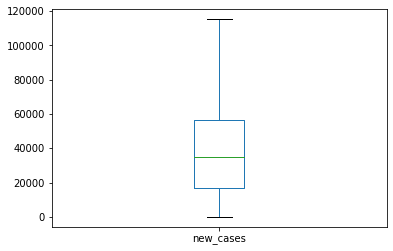

In [40]:
df_3['new_cases'].plot.box()

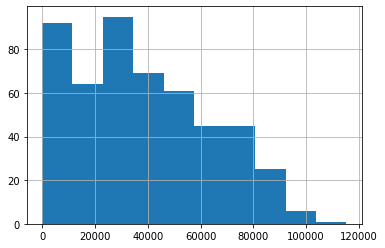

In [42]:
df_3['new_cases'].hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


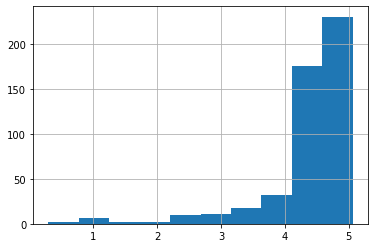

In [44]:
df_3['new_cases_log'] = log10(df_3['new_cases'])
df_3[df_3['new_cases_log'] > 0]['new_cases_log'].hist()

In [45]:
q1 = df_3['new_cases_log'].quantile(q=0.25)
q3 = df_3['new_cases_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.520792927741871


In [48]:
df_3[df_3['new_cases_log'] < (q1-1.5*iqr)]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,continent,location,date,new_deaths_log,new_cases_log
0,1.0,1.0,0.327000,2.427664,1.650550,0.000,0.005,0.005,0.001287,0.011488,0.007729,0.000,2.489771,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-26,0.217629,0.000000
1,1.0,0.0,0.326821,2.428373,1.650887,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-27,0.217717,-inf
2,1.0,0.0,0.326821,2.428373,1.650887,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-28,0.217717,-inf
3,2.0,1.0,0.329979,2.426451,1.650082,0.000,0.009,0.005,0.001308,0.011482,0.007727,0.000,2.489719,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-02-29,0.217506,0.000000
4,2.0,0.0,0.329869,2.427164,1.650422,0.000,0.009,0.000,0.001307,0.011485,0.007728,0.000,2.489689,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-01,0.217595,-inf
5,2.0,0.0,0.286000,2.425084,1.649525,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489600,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-02,0.217359,-inf
6,2.0,0.0,0.286000,2.425084,1.649525,0.000,0.009,0.000,0.001000,0.011476,0.007724,0.000,2.489600,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-03,0.217359,-inf
7,4.0,2.0,0.429000,2.421218,1.647906,0.000,0.019,0.009,0.002000,0.011458,0.007717,0.000,2.489552,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-04,0.216933,0.301030
8,4.0,0.0,0.429000,2.422653,1.648588,0.000,0.019,0.000,0.002000,0.011465,0.007720,0.000,2.489491,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-05,0.217112,-inf
9,13.0,9.0,1.714000,2.404774,1.641088,0.000,0.061,0.042,0.008000,0.011383,0.007687,0.000,2.489292,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil,2020-03-06,0.215132,0.954243


In [49]:
df_3_sem_outliers = df_3[(df_3['new_cases_log'] > (q1-1.5*iqr)) & (df_3['new_cases_log'] < (q3+1.5*iqr))]
len(df_3_sem_outliers)

443

# **Séries temporais**

In [147]:
df_3['date'] = pd.to_datetime(df_3['date'])

In [149]:
df_3.set_index('date', inplace=True)

In [150]:
df_3.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,continent,location
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,1.0,1.0,0.327000,2.427664,1.650550,0.0,0.005,0.005,0.001287,0.011488,0.007729,0.0,2.489771,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil
2020-02-27,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil
2020-02-28,1.0,0.0,0.326821,2.428373,1.650887,0.0,0.005,0.000,0.001285,0.011491,0.007730,0.0,2.489741,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil
2020-02-29,2.0,1.0,0.329979,2.426451,1.650082,0.0,0.009,0.005,0.001308,0.011482,0.007727,0.0,2.489719,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil
2020-03-01,2.0,0.0,0.329869,2.427164,1.650422,0.0,0.009,0.000,0.001307,0.011485,0.007728,0.0,2.489689,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,2.2,75.88,0.765,BRA,South America,Brazil


In [ ]:
df_3.info()

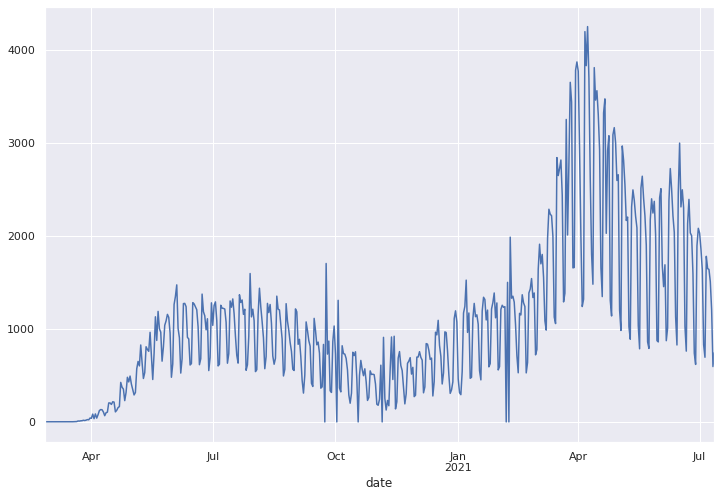

In [153]:
plt.figure(figsize=(12, 8))
data = df_3.new_deaths
data.plot()

In [123]:
data_frame_tseries = pd.DataFrame(data)

In [ ]:
df_4 = pd.DataFrame(np.arange(len(date)), index=date)
df_4.tail()

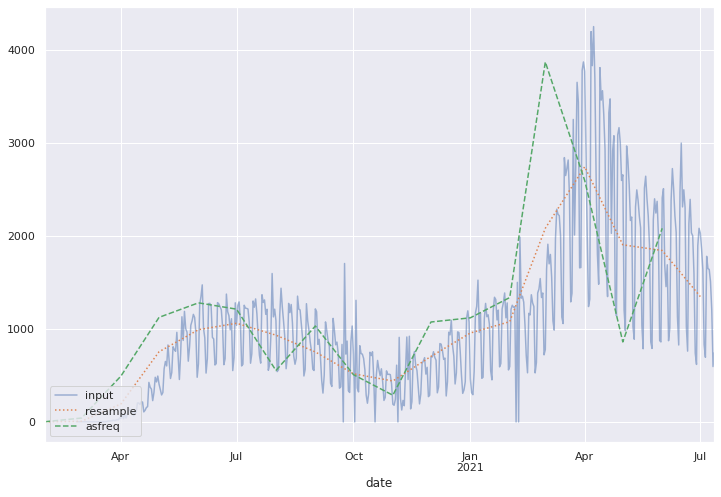

In [154]:
plt.figure(figsize=(12, 8))
data["2020":].plot(alpha=0.5, style='-')
data.resample('BM').mean().plot(style=':')
data.asfreq('BM').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='lower left');

## Janela deslizante

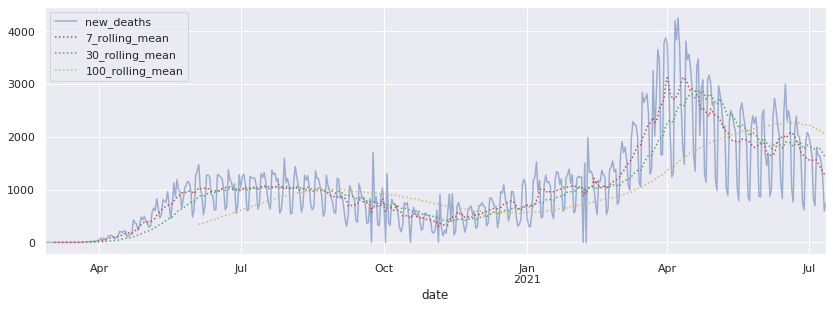

In [157]:
# Média móvel

plt.figure(figsize=(14, 10))

plt.subplot(211)
data.plot(alpha=.5)
(data.rolling(7)
 .mean()
 .plot(label="7_rolling_mean", style='r:', alpha=1)
)
(data.rolling(30)
 .mean()
 .plot(label="30_rolling_mean", style='g:', alpha=1)
)
(data.rolling(100)
 .mean()
 .plot(label="100_rolling_mean", style='y:', alpha=1)
)
plt.legend()

Quanto menor a janela da média móvel, menos erro de predição teremos

date
2020-02-29         NaN
2020-03-31         NaN
2020-04-30    2.884037
2020-05-31    2.383247
2020-06-30    1.529473
2020-07-31    1.140790
2020-08-31    0.941901
2020-09-30    0.802686
2020-10-31    0.709045
2020-11-30    0.767467
2020-12-31    1.284134
2021-01-31    1.372098
2021-02-28    1.116008
2021-03-31    1.577983
2021-04-30    1.376629
2021-05-31    0.851724
2021-06-30    0.843674
2021-07-31    0.371792
Freq: M, Name: new_deaths, dtype: float64


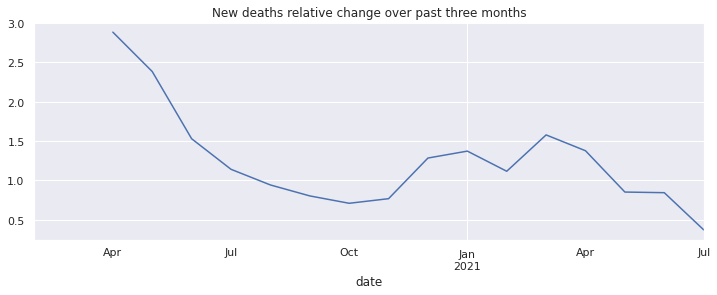

In [170]:
plt.figure(figsize=(12, 4))
monthly = data.resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="New deaths relative change over past three months")
print(diff)

O diff significa que, por exemplo, a média de 2020-04-30 foi 2.8 vezes maior do que a dos últimos três meses

date
2020-02-29         NaN
2020-03-31         NaN
2020-04-30    2.803285
2020-05-31    2.491975
2020-06-30    1.906131
2020-07-31    1.468309
2020-08-31    1.101354
2020-09-30    0.794389
2020-10-31    0.756672
2020-11-30    0.988966
2020-12-31    1.403222
2021-01-31    1.249964
2021-02-28    0.958296
2021-03-31    1.299578
2021-04-30    1.050696
2021-05-31    0.944169
2021-06-30    1.038972
2021-07-31    0.370842
Freq: M, Name: new_cases, dtype: float64


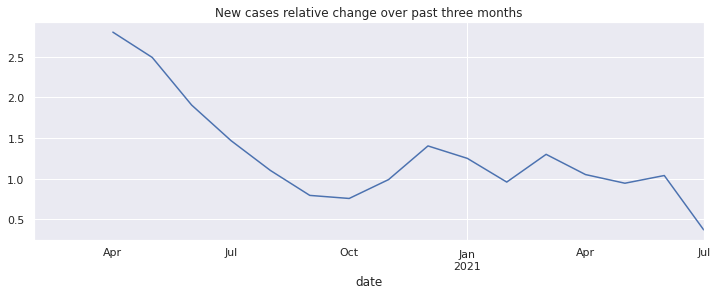

In [161]:
plt.figure(figsize=(12, 4))
monthly = df_3['new_cases'].resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="New cases relative change over past three months")
print(diff)

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-07-08    1.137743
2021-07-09    1.084942
2021-07-10    0.906404
2021-07-11    0.459156
2021-07-12    0.571757
Freq: D, Name: new_deaths, Length: 503, dtype: float64


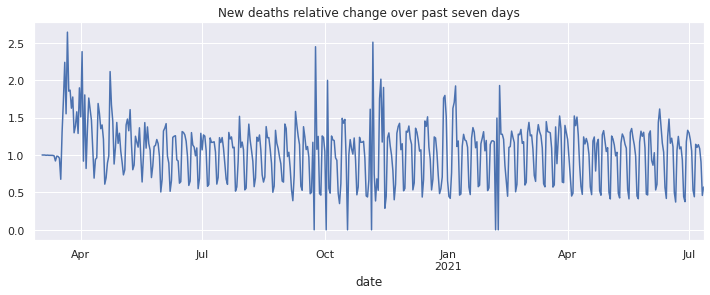

In [172]:
plt.figure(figsize=(12, 4))
monthly = data.resample("d").sum()
diff = (monthly / monthly.rolling(7).mean())
diff.plot(title="New deaths relative change over past seven days")
print(diff)

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-07-08    1.104615
2021-07-09    1.213581
2021-07-10    1.038382
2021-07-11    0.457808
2021-07-12    0.379117
Freq: D, Name: new_cases, Length: 503, dtype: float64


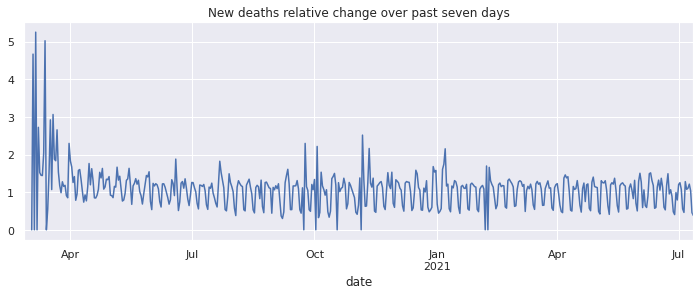

In [175]:
plt.figure(figsize=(12, 4))
monthly = df_3['new_cases'].resample("d").sum()
diff = (monthly / monthly.rolling(7).mean())
diff.plot(title="New deaths relative change over past seven days")
print(diff)

É visível que, analizando as médias móveis com intervalos de sete dias (uma semana), existe uma sazonalidade no comportamento da distribuição dos dados, tanto no número de mortes quanto no número de casos. Provavelmente isso ocorre pelo fato de um máximo local se referir ao dia em que as ocorrências dos hospitais sejam registrados.

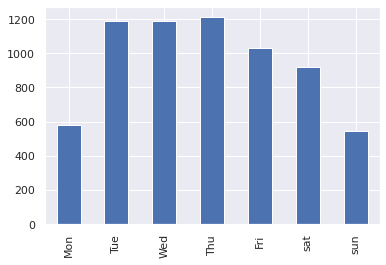

In [179]:
median_by_day = df_3.new_deaths.groupby(df_3.new_deaths.index.dayofweek).median()
median_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "sat", "sun"]
median_by_day.plot(kind="bar")

In [180]:
prophet_df = df_3[["new_deaths"]].reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df.tail()

,ds,y
498,2021-07-08,1639.0
499,2021-07-09,1509.0
500,2021-07-10,1205.0
501,2021-07-11,595.0
502,2021-07-12,745.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


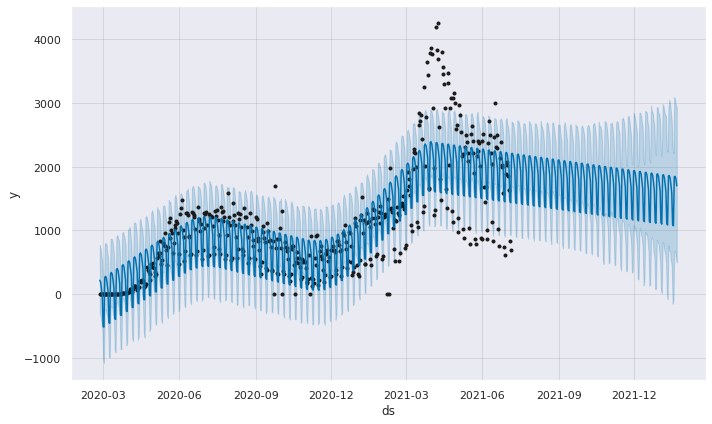

In [186]:
m = Prophet()
m.fit(prophet_df[:-7])
pred = m.predict(m.make_future_dataframe(periods=200))
m.plot(pred);

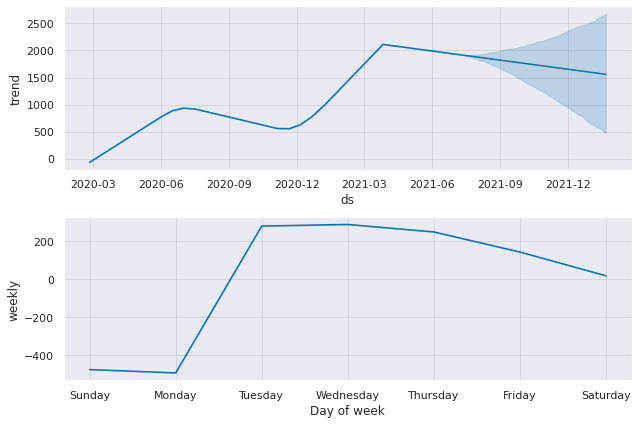

In [187]:
m.plot_components(pred);

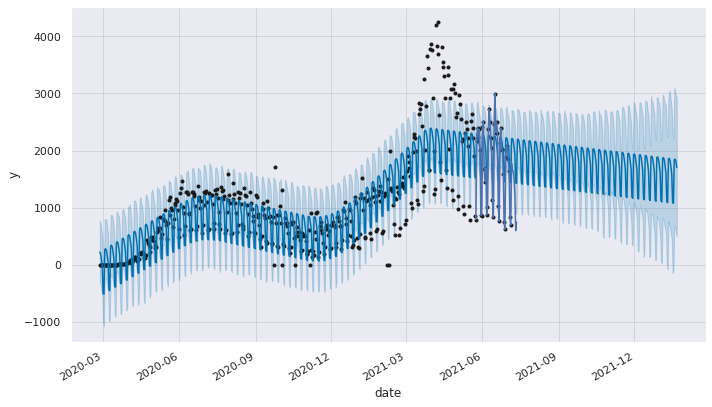

In [190]:
m.plot(pred);
df_3.new_deaths[-50:].plot()